<a href="https://colab.research.google.com/github/RozenkovAndrey/projects_of_yandex_practicum/blob/main/Games/Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

Проект направлен на исследование продаж игровых платформ в Северной Америке, Европе и США.

Цель: Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо сделать предобработку данных, изучить пропуски, отформатировать названия столбцов. Затем изучить как изменялись продажи по годам в зависимости от платформы, выбрать нужный период и продолжить исследование. Далее посмотреть как влияют оценки пользователей и критиков на доходы с продажи платформ различных производителей. Посмотреть какие платформы, жанры игр и категории игр самые популярные в Северной Америке, Европе и Японии.

Проверить гипотезы:
- о равенстве средних пользовательских оценок для платформ Xbox One и PC
- о равенстве средних пользовательских рейтингов жанров Action и Sports

Сделать общий вывод по проекту.

In [5]:
!gdown --id 1dsznmPS_zid1jgdIhT3C926w2RuIuI4u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dsznmPS_zid1jgdIhT3C926w2RuIuI4u
To: /content/games.csv
100% 1.18M/1.18M [00:00<00:00, 68.3MB/s]


# Предобработка данных

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('classic')

In [7]:
import pandas as pd
df = pd.read_csv("games.csv")

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Привожу названия столбцов к нижнему регистру и переназываю столбцы

In [9]:
a = list(df.columns)
print(a)

['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']


In [10]:
sp1 = []
for i in a:
  i = i.lower()
  sp1.append(i)
print(sp1)  

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [11]:
#empty dictionary
dict1 = {}

for key in a:
    for value in sp1:
        dict1[key] = value
        sp1.remove(value)
        break  

In [12]:
print(dict1)

{'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}


In [13]:
df = df.rename(columns=dict1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#Смотрю форматы столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
#Смотрю пропуски
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Преобразовываю данные в нужные типы и работаю с пропусками

В 6 столбцах есть пустые ячейки. 

- В столбцах name, genre и year_of_release мало пропущенных значений - удаляю строки с пропусками. эти значения занимают менее 10% датасета и особо не повлияют на статистику.

- в столбцах critic_score, user_score и rating много пропущенных значений, оставляем их пустыми. Для смены формата user_score меняю пустые значения на - 150, меняю формат и потом опять возвращаю пустые значения вместо -150.
tbd означает, что оценок слишком мало для определения среднего рейтинга, поэтому его тоже меняю сперва на -150, а затем на NaN.





In [16]:
#Делаю фильтрацию по пустым датам релиза и меняю формат столбца с годом релиза на числовой
df = df.loc[df.year_of_release.notna() == True]
df['year_of_release'] = df['year_of_release'].astype('int64')
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [17]:
#Меняю формат столбца user_score
import numpy as np
df.user_score = df.user_score.fillna(-150)
print('Количество значений tbd в столбце user_score:',len(df[df.user_score == 'tbd']))
df.user_score = df.user_score.replace('tbd',-150)
df.user_score = df.user_score.astype('float64')
df.user_score = df.user_score.replace(-150, np.NaN)
df.info()

Количество значений tbd в столбце user_score: 2376
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
#Удаляю пустые значения в столбце name и genre
df = df.dropna(subset=['name', 'genre'])

In [19]:
#Проверяю, что всё удалилось
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [20]:
# Проверяю на явные дупликаты:
print('Дубликатов явных:', df.duplicated().sum())

Дубликатов явных: 0


In [21]:
#Смотрю уникальные значения столбцов
display(df['year_of_release'].unique())
display(df['genre'].unique())
display(df['critic_score'].unique())
display(df['user_score'].unique())
display(df['rating'].unique())
display(df['platform'].unique())

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Вывод:** В данных прослеживается зависимость, если какогото убрать пустые значения одного столбца (например, Critic_Score), то большинстов пустых значений также уходят User_Score и Rating (пересечение множеств). Полагаю, что для расчёта рейтинга используются данные Critic_Score и User_Score. Пустые значения в столбцах Critic_Score и User_Score можно объяснить, что не все игры мега популярны и возможно собрать достаточное количество оценок, также может быть, что данные скрыты, технические причины (например, при передаче информации данные не отобразились или оператор их не ввёл). Также можно посмотреть на года игр. Когда выходили некоторые игры ещё не было такой профессии аналитик и данные по оценкаам просто не собирались.

Возможно, year_of_release не заполнено, потому что игра не вышла или вышла с задержкой. В столбцах name, genre вероятная причина пропусков - невнимательность оператора или ошибки при передачи информации.

In [22]:
# Добавляю столбец с суммарными продажами по странам
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [23]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

In [24]:
# Ставлю заглушку в столбце рейтинг для пустых значений
df['rating'] = df['rating'].fillna(-1)

# Исследовательский анализ

In [25]:
#Строю сводную таблицу с наименованием года и количеством игр, вышедших в этом году
year_of_release_count = df.groupby('year_of_release').agg({'year_of_release':'count'})
year_of_release_count['year_of_release1'] = year_of_release_count.index
sp2 = []
[sp2.append(i) for i in range(len(year_of_release_count))]
year_of_release_count['new_index'] = sp2
year_of_release_count = year_of_release_count.set_index('new_index')
year_of_release_count = year_of_release_count.rename(columns={'year_of_release':'count_games'})
print(year_of_release_count)

           count_games  year_of_release1
new_index                               
0                    9              1980
1                   46              1981
2                   36              1982
3                   17              1983
4                   14              1984
5                   14              1985
6                   21              1986
7                   16              1987
8                   15              1988
9                   17              1989
10                  16              1990
11                  41              1991
12                  43              1992
13                  60              1993
14                 121              1994
15                 219              1995
16                 263              1996
17                 289              1997
18                 379              1998
19                 338              1999
20                 350              2000
21                 482              2001
22              

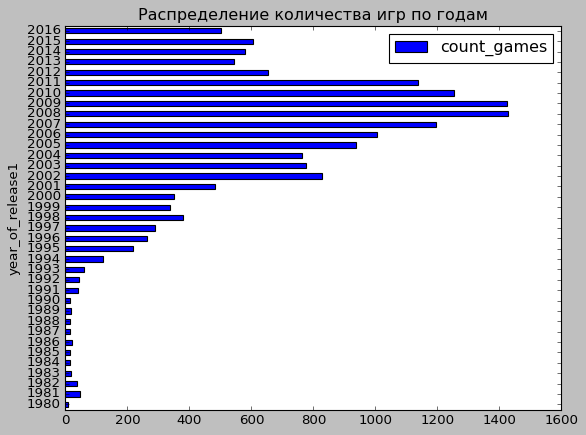

In [26]:
#Делаю визуализацию таблицы с количеством игр по годам
year_of_release_count.plot(kind = 'barh', x = 'year_of_release1', y= 'count_games')
plt.title('Распределение количества игр по годам')
plt.show()

**Вывод:**   Из диаграммы видно, что максимальное количество игр было в 2008 и 2009 годах, а потом пошло на спад. Связано это может быть с международным финансовым кризисом, когда покупательская способность у мирового населения снизилась. Также развивается пиратство в сфере игр и развиваются компьютерные игры и мобильные приложения, которые замещают игровые платформы. 

In [27]:
#Вывожу топ 20 платформ по суммарным продажам
sales_platform = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by = 'sum_sales', ascending=False)
display(sales_platform.head(20))
sp3 = []
for i in sales_platform.index:
  sp3.append(i)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


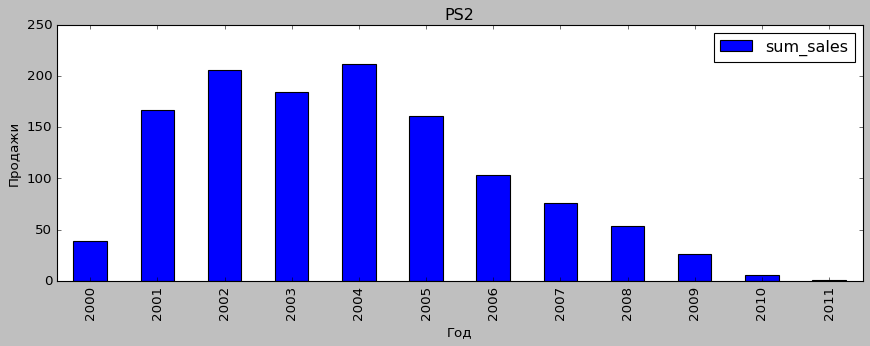

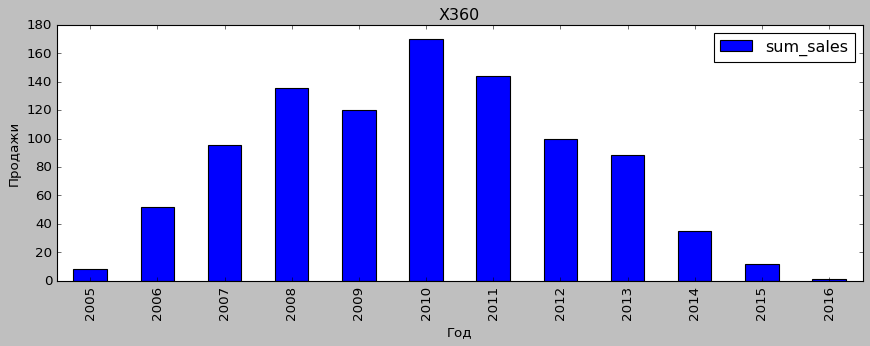

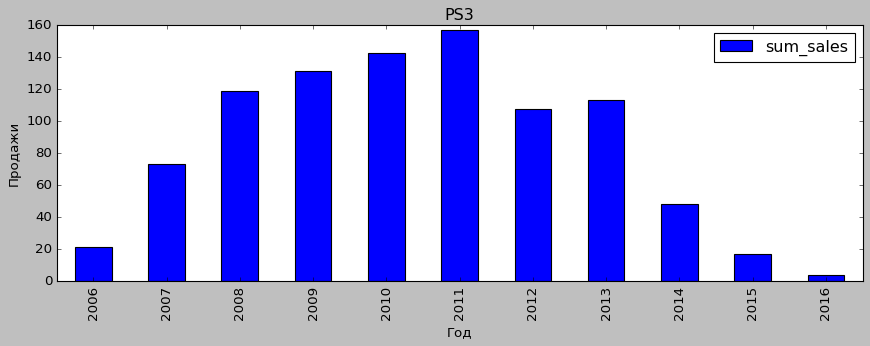

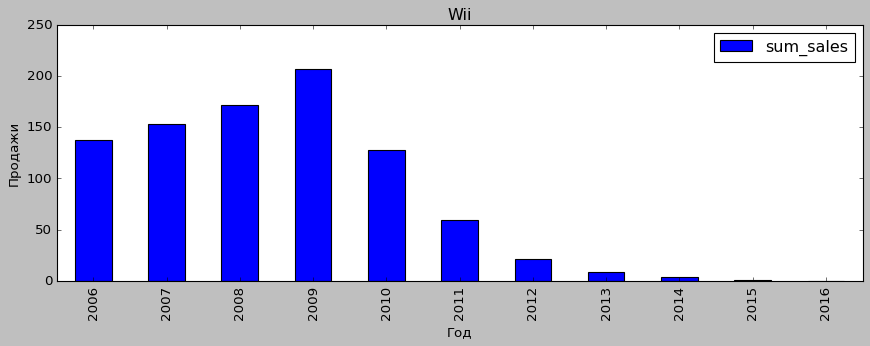

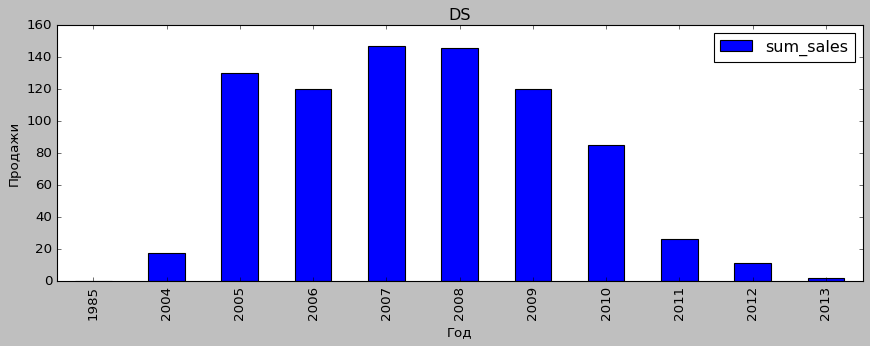

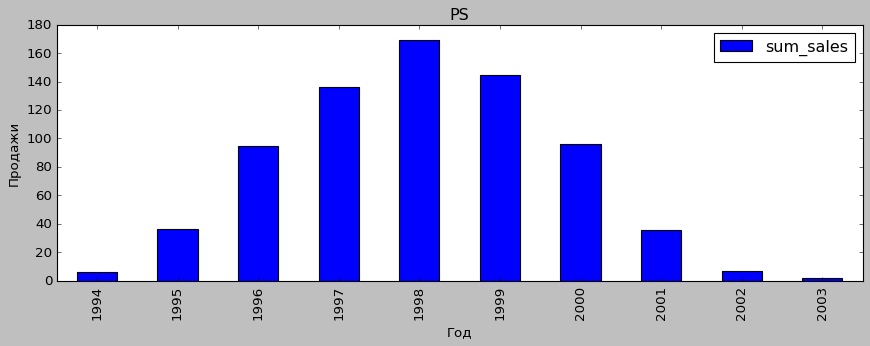

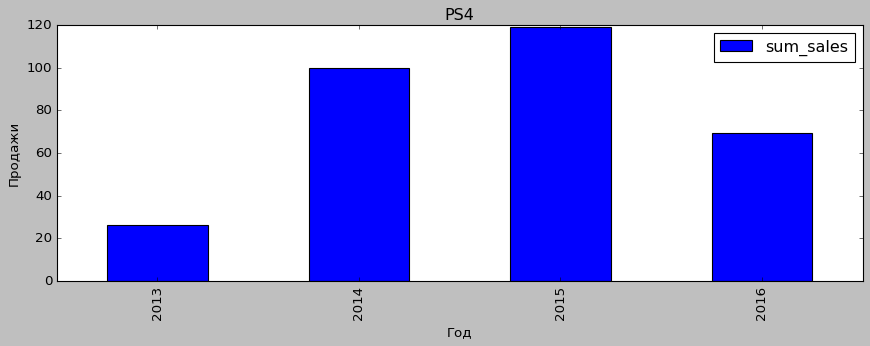

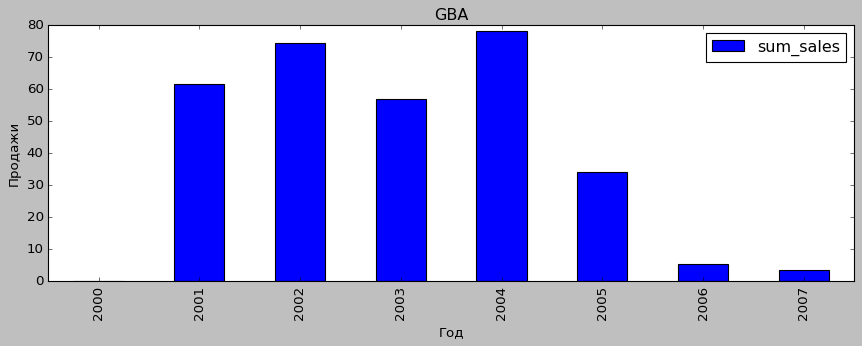

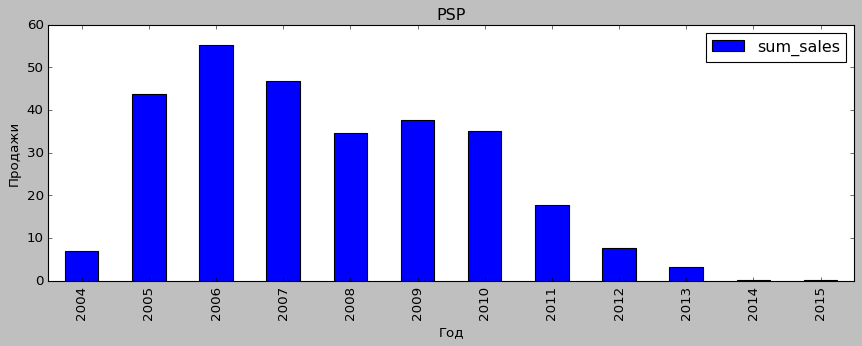

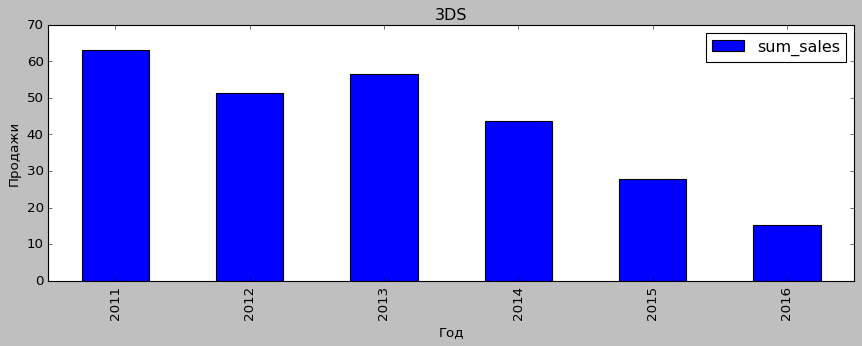

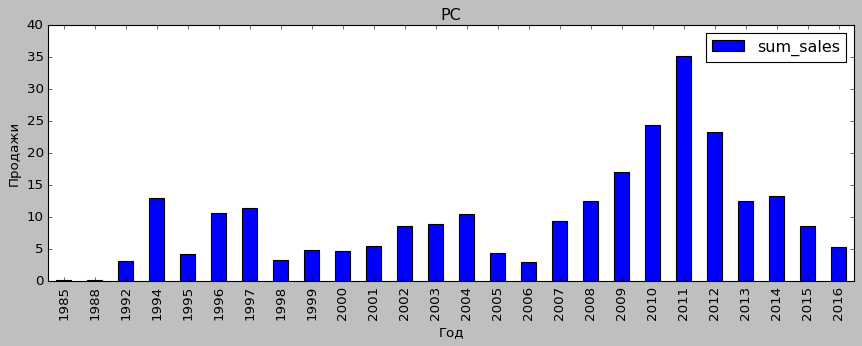

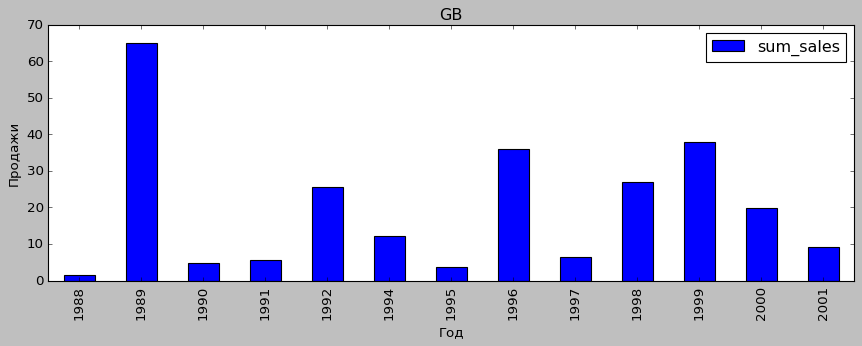

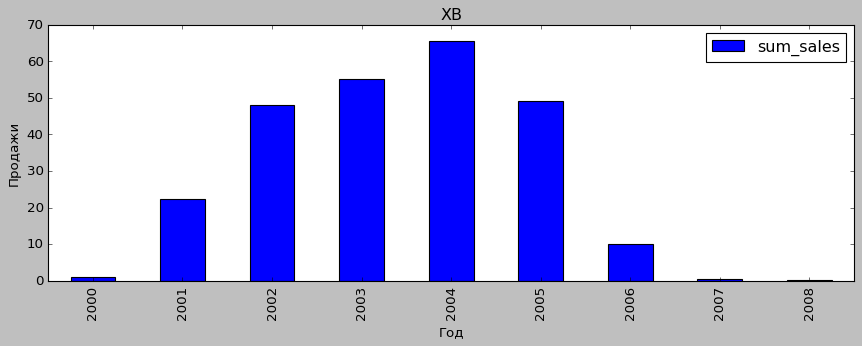

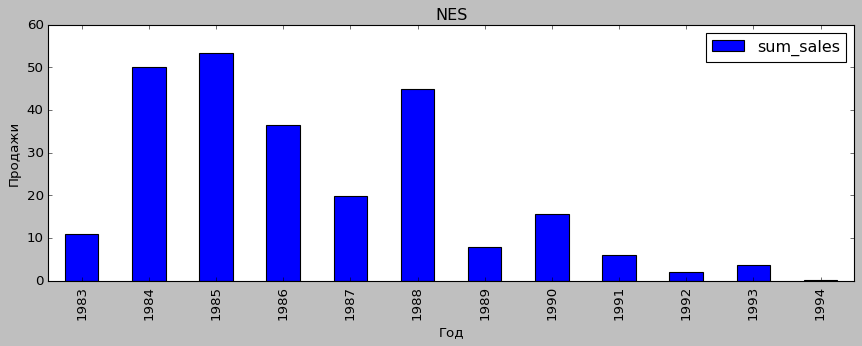

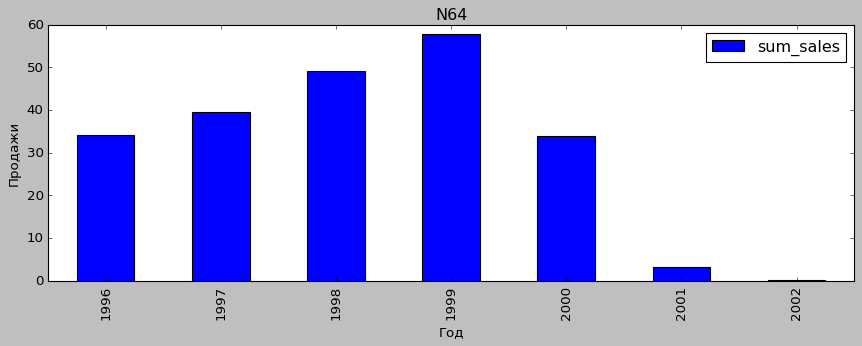

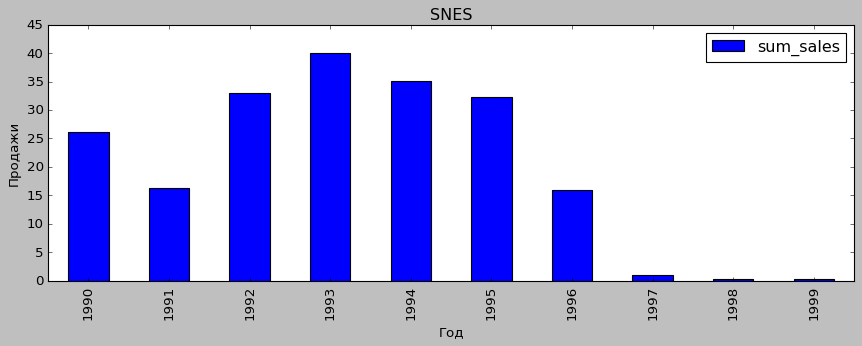

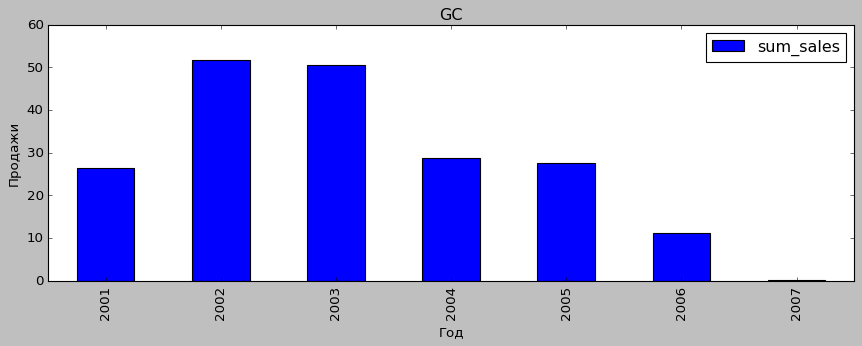

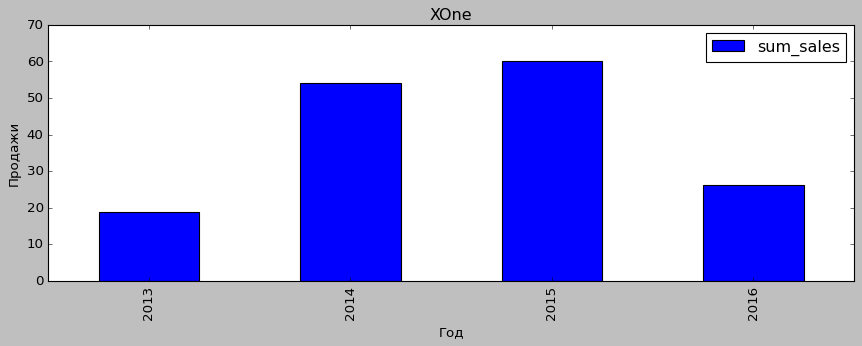

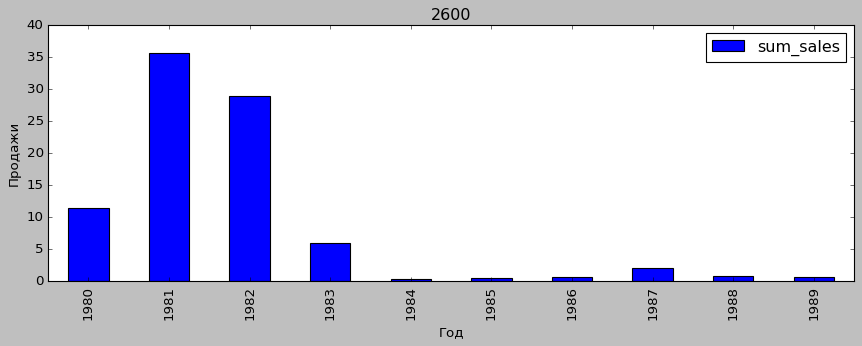

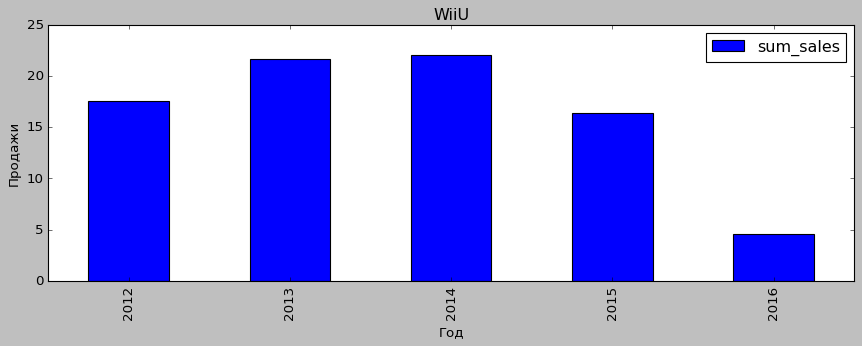

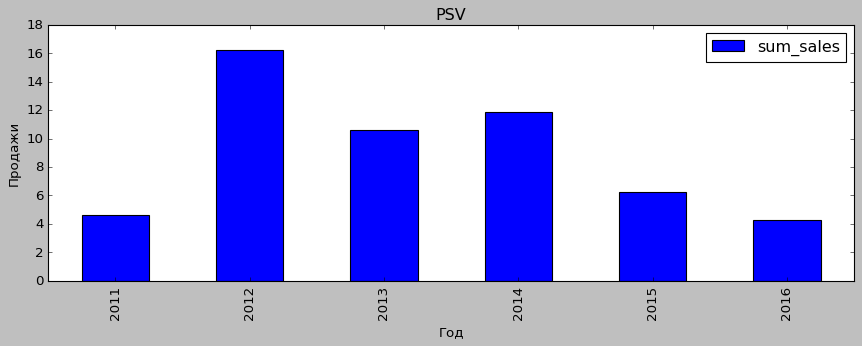

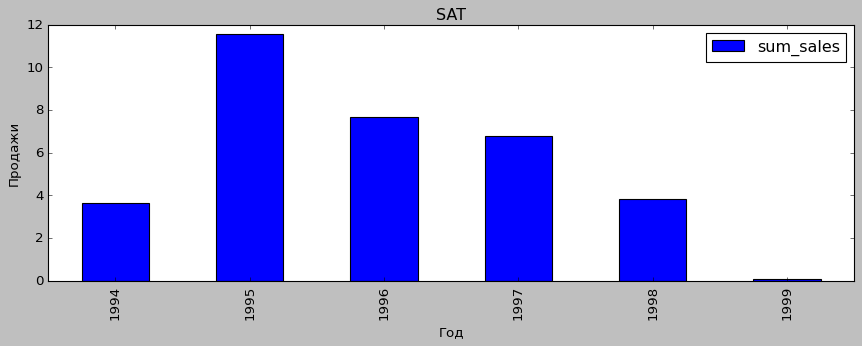

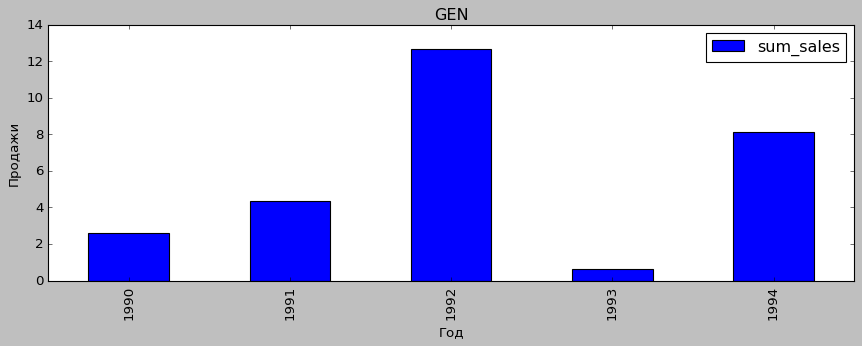

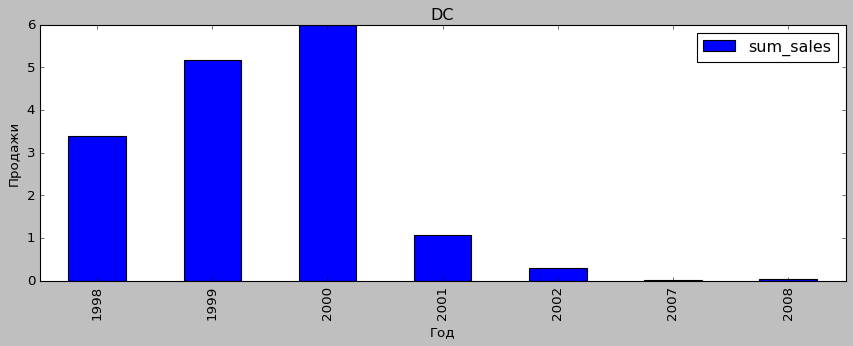

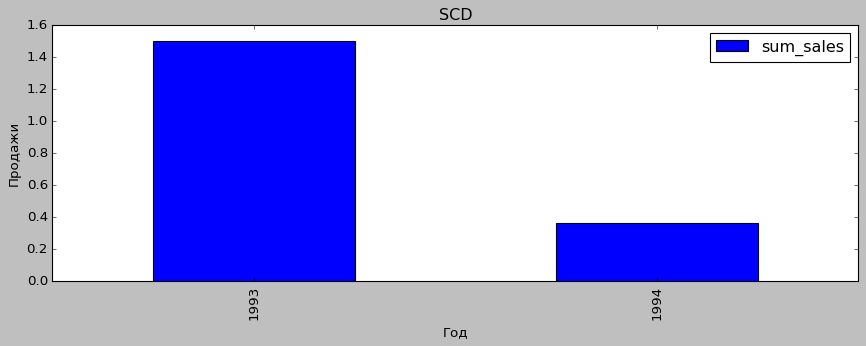

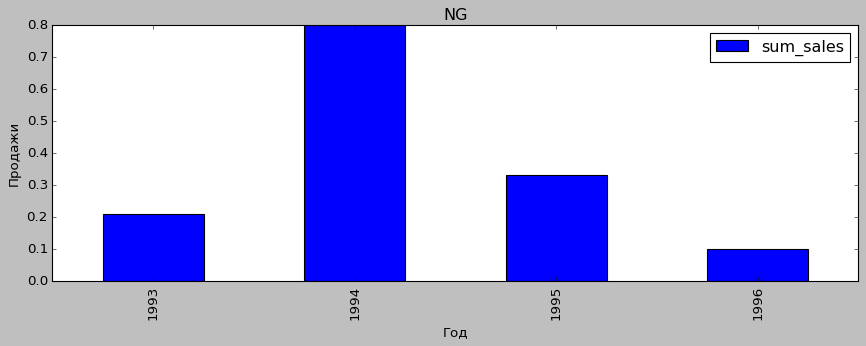

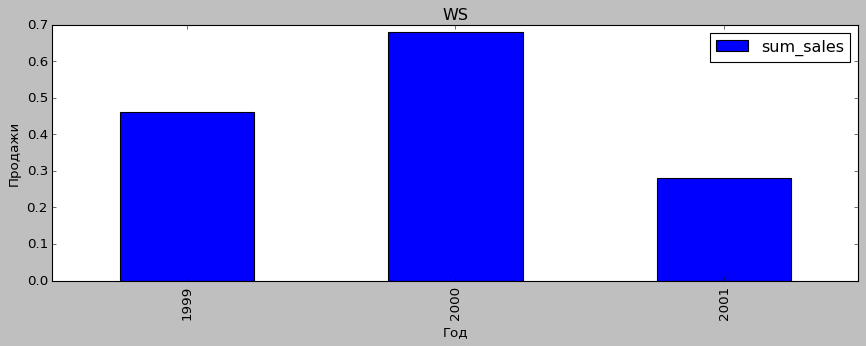

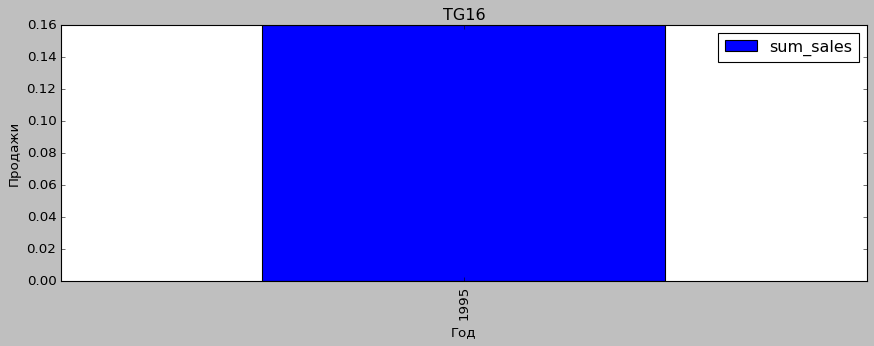

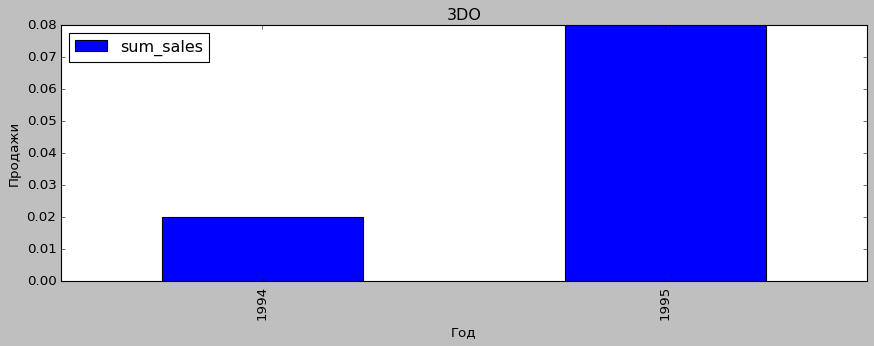

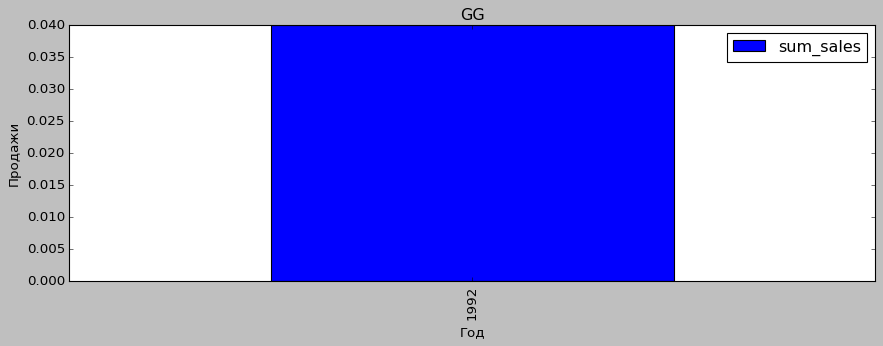

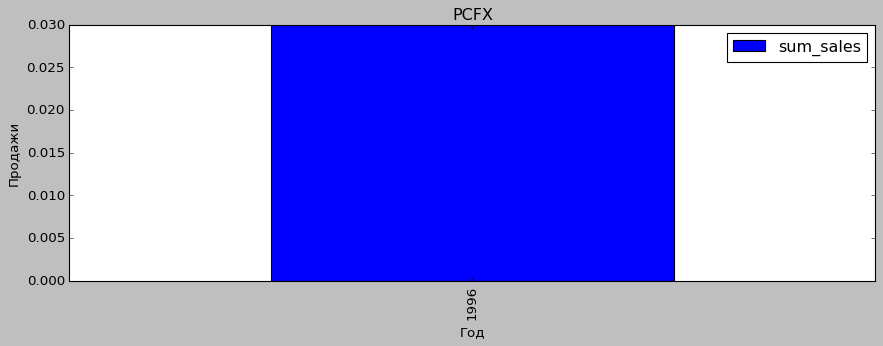

In [28]:
#Строю распределение продаж по годам из топ-20 платформ
import warnings
warnings.filterwarnings("ignore")
for platform in sp3:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar', figsize=(13, 4))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')

**Вывод:**   Из диаграмм видно, что одни платформы с течением времени заменяют другие.  За всё время наблюдений лидируют платформы 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'. 


За какой характерный срок появляются новые и исчезают старые платформы?

- Какого-то определённого срока жизни платформы нет, есть те, которые активны 1-2 года, а есть, которые по 12 лет, есть палтформы с двумя пиками активноcти.
- Прогноз на 2017 год для лидеров по продажам:

будут существовать: 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV'

не будут существовать или прибыль будет минимальна:  
'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', '2600', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG', 'PCFX'

In [29]:
#Определяю актуальный период для дальнейшего анализа
df_query = df.query('year_of_release >= 2012')

Был выбрал актуальный период с 2012 года по причине:

- Согласно графику распределения глобальных продаж по платформам с 2011 года произошел резкий спад и по задаче требуется дать оценку на 2017 год.

In [30]:
#Строю сводную таблицу по топ-10 платформам по продажам после 2012 года
platform_sum_after_2012 = df_query.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
platform_sum_after_2012.columns = ['sales_by_platform']
platform_sum_after_2012 = platform_sum_after_2012.sort_values(by = 'sales_by_platform', ascending=False).head(10)
platform_sum_after_2012

,sales_by_platform
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


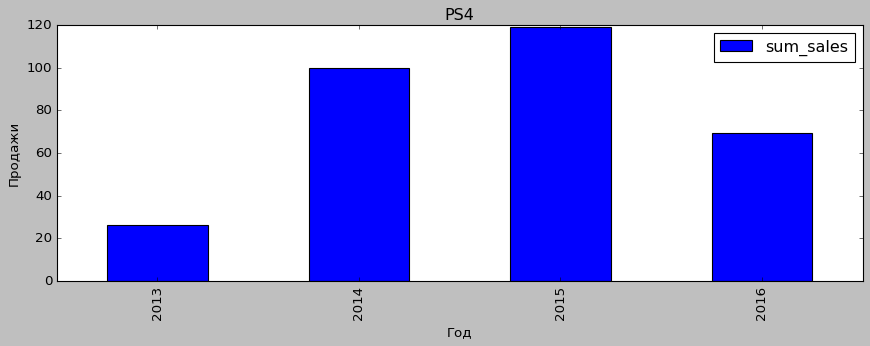

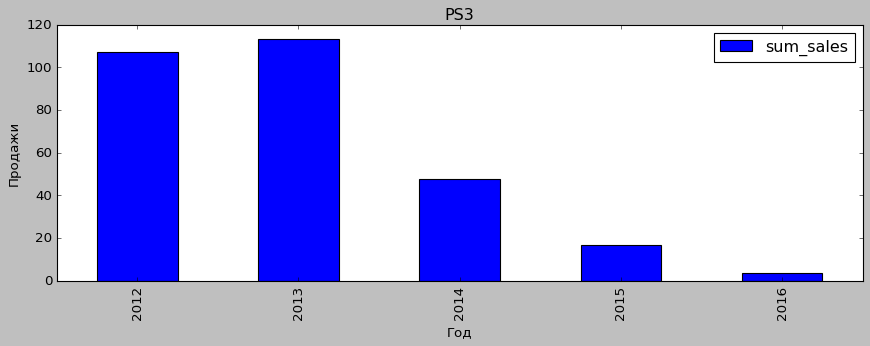

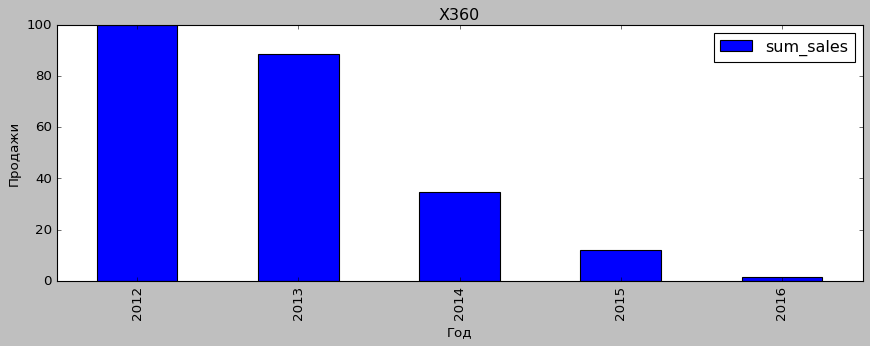

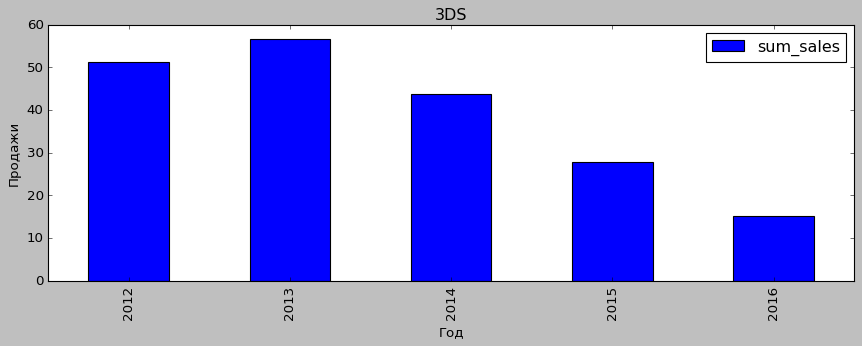

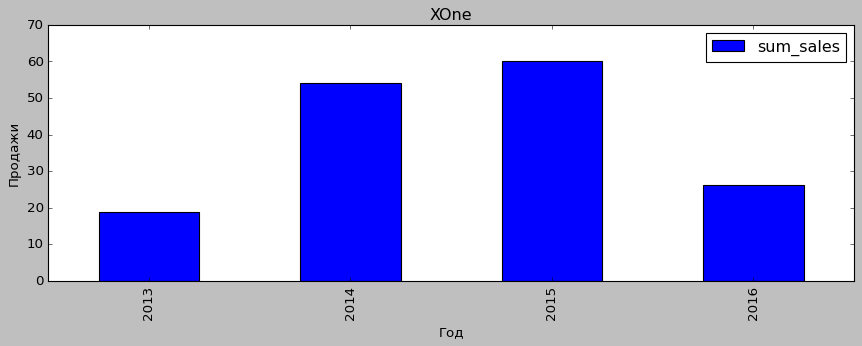

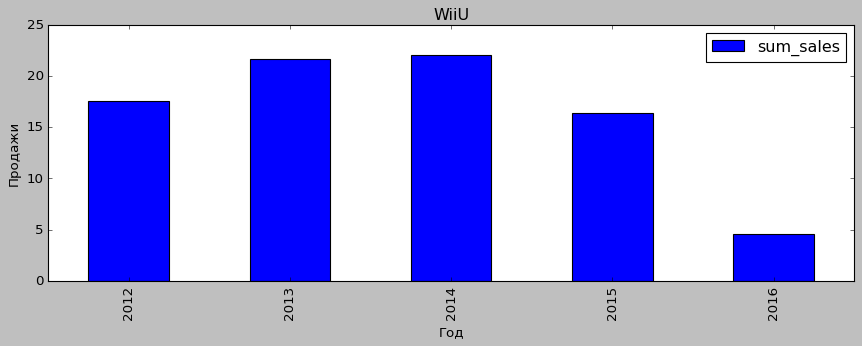

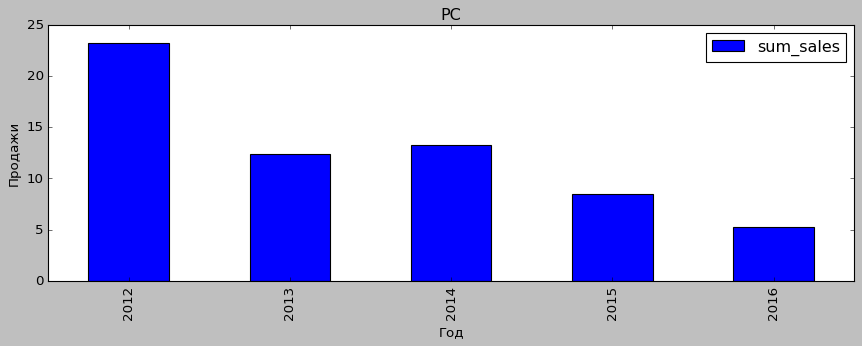

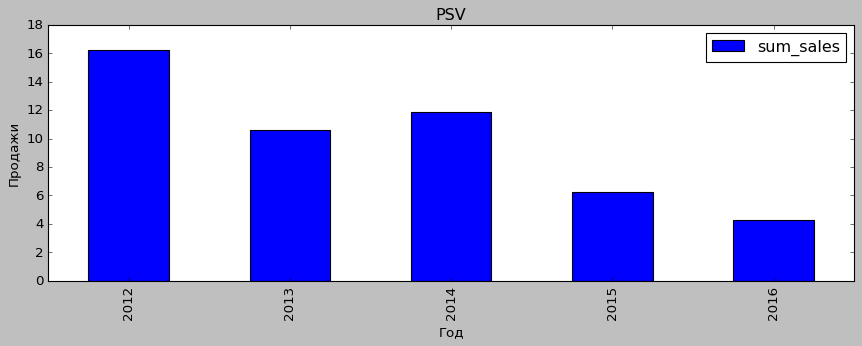

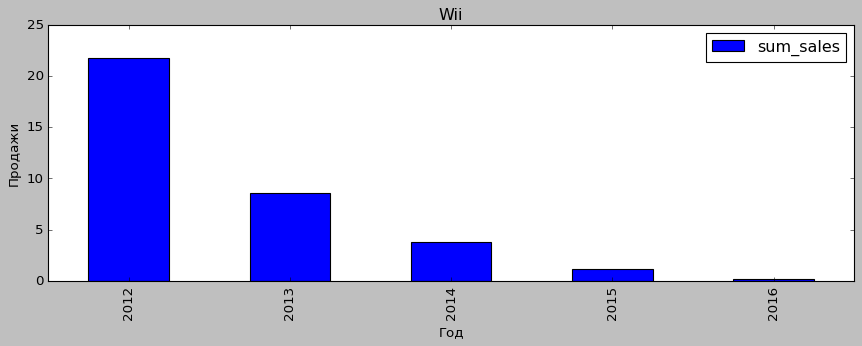

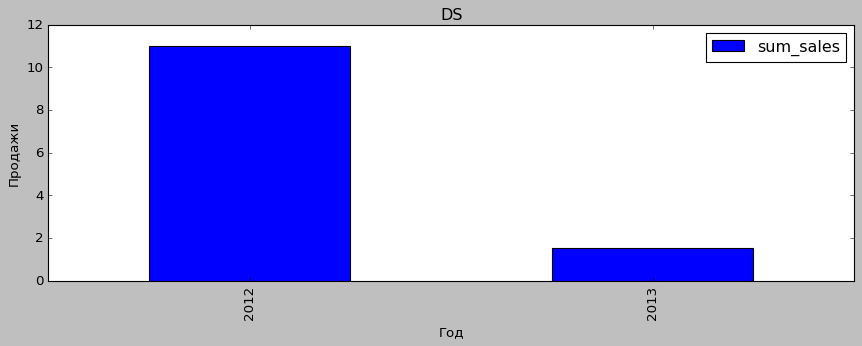

In [31]:
#Строю диаграммы по продажам топ-10 платформ по продажам за период с 2012 по 2016
sp4 = []
for i in platform_sum_after_2012.index:
  sp4.append(i)

for platform in sp4:
    df_query[df_query['platform'] == platform].pivot_table(index='year_of_release', values=['platform', 'sum_sales'], \
                                                           aggfunc='sum').plot(kind='bar', figsize=(13, 4))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')

**Вывод:**   После построения графиков наблюдается, что платформы все представленные платформы находяится в состоянии спада. Можно предположить, что в 2017 году продажи будут также на низком уровне. Это может быть связано с общим спадом продаж в игровой индустрии о чём свидетельствует диаграмма распределения количества игр по годам.

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. 

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

- Соотнесите выводы с продажами игр на других платформах. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
# Строю боксплоты для по продажам для топ платформ за период с 2012 по 2016 годы по убыванию медиан продаж

import plotly.express as px
fig = px.box(df_query,
            x='platform',
            y='sum_sales',
            title='Глобальные продажи по платформам за актуальный период',
            labels={'platform' : 'Платформы',
                   'sum_sales' : 'Продажи'},
             range_y = (0,6),
             color='platform',
             boxmode='overlay',
             
            )
fig.update_xaxes(categoryorder='median descending')
fig.show()

In [ ]:
# Строю боксплоты для по продажам для топ платформ за период с 2012 по 2016 годы по убыванию суммарных продаж
import plotly.express as px
fig = px.box(df_query,
            x='platform',
            y='sum_sales',
            title='Глобальные продажи по платформам за актуальный период',
            labels={'platform' : 'Платформы',
                   'sum_sales' : 'Продажи'},
             range_y = (0,6),
             color='platform',
             boxmode='overlay',
             
            )
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
# Строю боксплоты для по продажам для топ платформ за период с 2012 по 2016 годы по убыванию суммарных продаж после 75 квартиля
print(df_query.sum_sales.quantile(0.75))
print(len(df_query))
df_query_global = df_query[df_query.sum_sales>=0.43]
print(len(df_query_global))
df_query_global.head()
#df_query.sum_sales[df_query.sum_sales>= np.percentile(df_query.sum_sales, 0.75)]
import plotly.express as px
fig = px.box(df_query_global,
             x='platform',
             y='sum_sales',
             title='Глобальные продажи по платформам за актуальный период',
             labels={'platform' : 'Платформы',
                    'sum_sales' : 'Продажи'},
              range_y = (0,10),
              color='platform',
              boxmode='overlay',
             
             )
fig.update_xaxes(categoryorder='total descending')
fig.show()

Убрал отрицательную шкалу, добавил гистограммы с распределением по убыванию продаж с платформ суммарным и суммарным продажам после 75 процентиля 

**Вывод:** В разбивке по платфомам в периоде с 2012 года видно, что по медианному значению лидируют платформы x360, WiiU и XOne.

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.



In [35]:
#Делаю два датасета - один с выбранной платформой PS4, другой с дргуими платформами за период с 2012 года
filter_list_top1_user = df_query['platform'] == "PS4"
filter_list_other_critic = df_query['platform'] != "PS4"

df_for_ratings_top1 = df_query[filter_list_top1_user]
df_for_ratings_other = df_query[filter_list_other_critic]
df_for_ratings_other.platform.unique()

array(['PS3', 'X360', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'PSP'], dtype=object)

Убрал фильтрацию по пропускам пользователей и критиков

In [36]:
# Выбираю платформу SP4 из ранее соданного списка и
#другие платформы из этого же списка за период с 2012 года.

choice_platform = []
choice_platform.append(sp4[0])
other_platform = []
other_platform.append(sp4[1:])

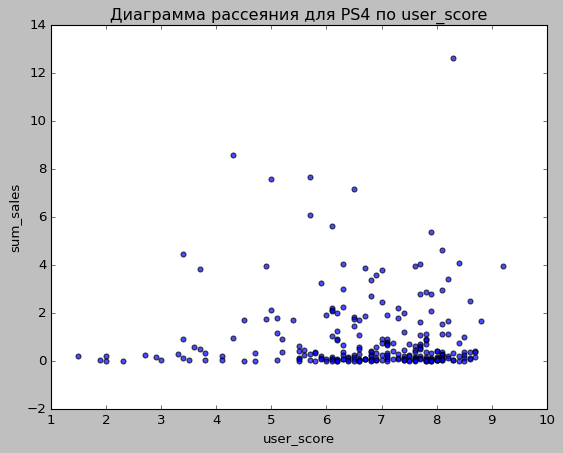

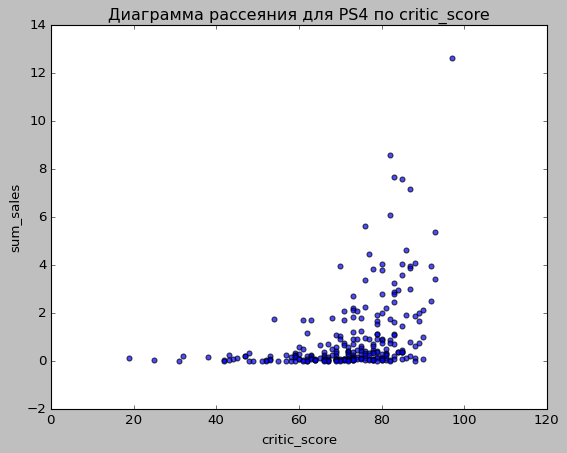

In [37]:
#Строю диаграммы рассеяния для выбранной платформы PS4 по оценкам критиков и пользователей
score_types = ('user_score', 'critic_score')
 
for platform_name in choice_platform:
    for score_type in score_types:
        (df_for_ratings_top1[df_for_ratings_top1['platform'] == platform_name]
         .plot(x=score_type, 
               y='sum_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {} по {}'.format(platform_name, score_type), 
               alpha = 0.7))
        plt.show()

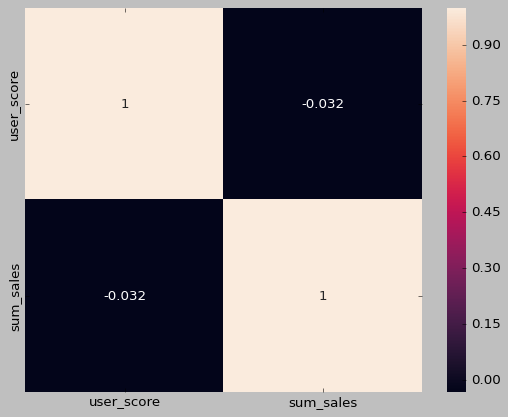

In [38]:
#Строю визуализацию для выявления линейной зависимости суммарных продаж от оценок пользователей 
sns.heatmap(df_for_ratings_top1[['user_score','sum_sales']].corr(method='pearson'), annot=True)

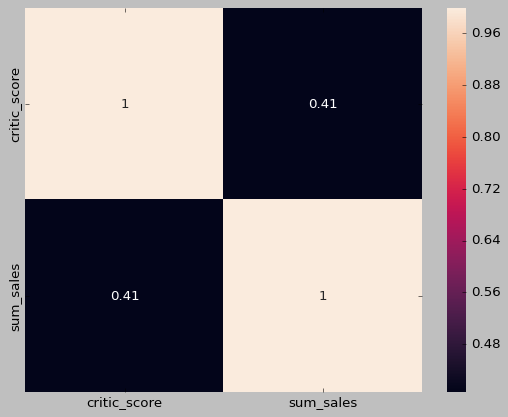

In [39]:
#Строю визуализацию для выявления линейной зависимости суммарных продаж от оценок критиков 
sns.heatmap(df_for_ratings_top1[['critic_score','sum_sales']].corr(method='pearson'), annot=True)

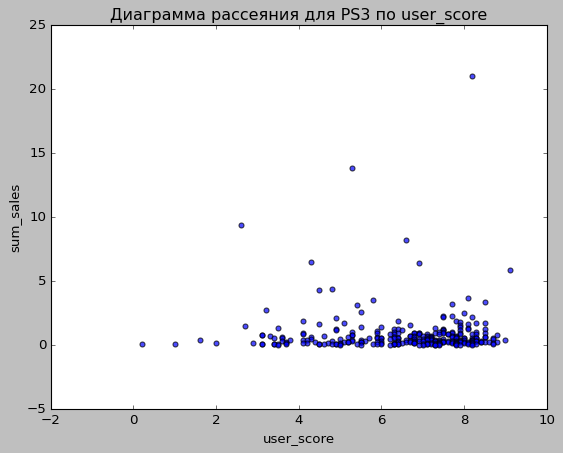

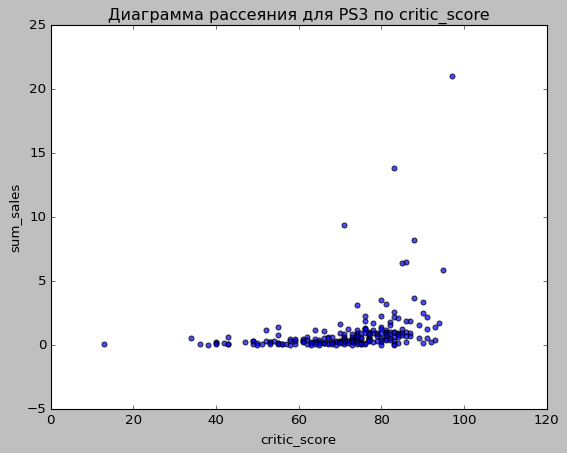

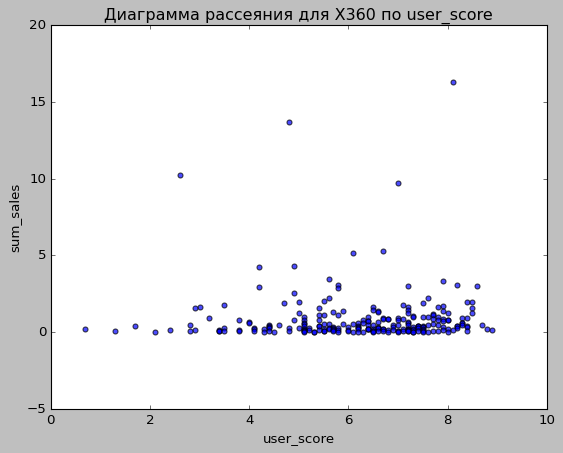

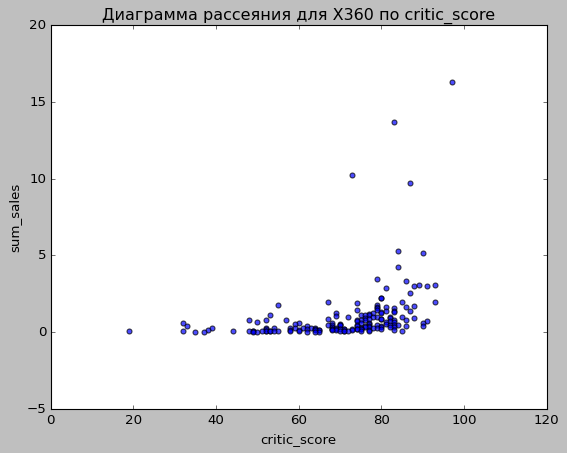

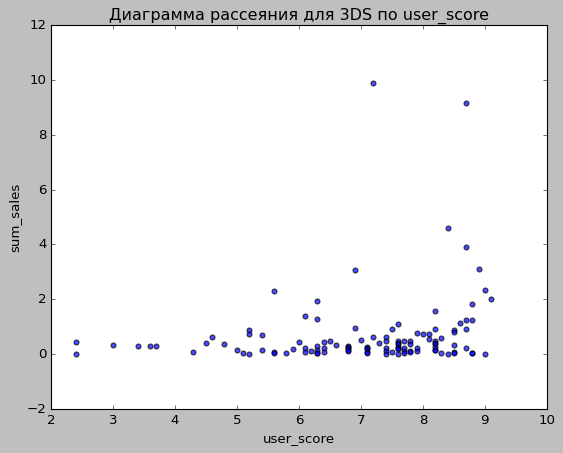

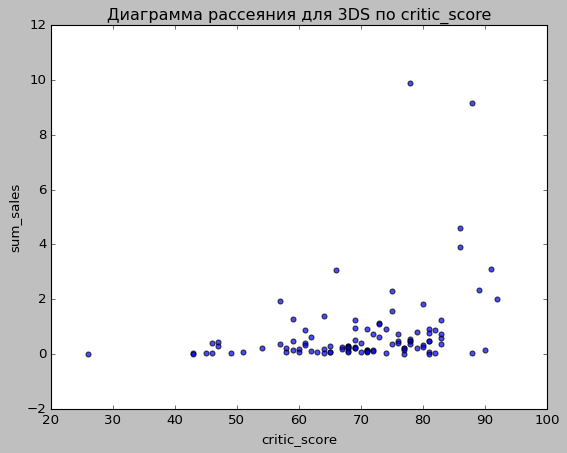

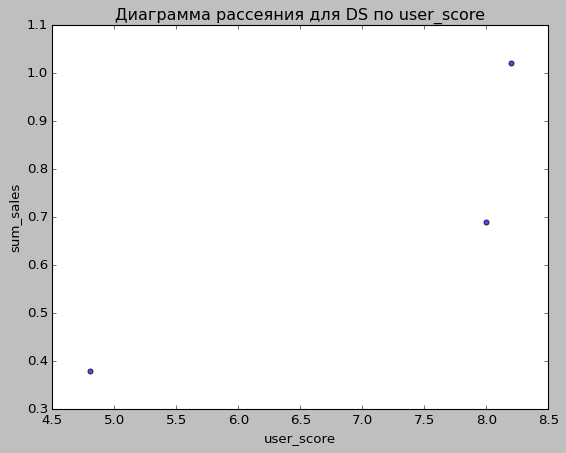

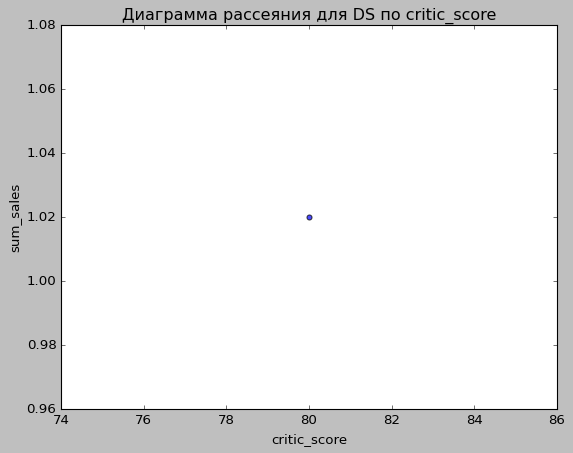

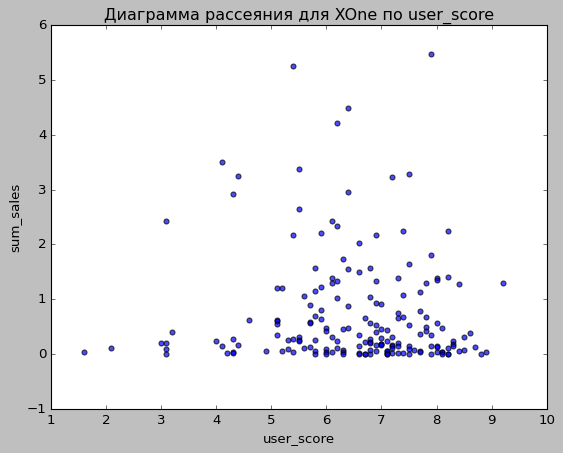

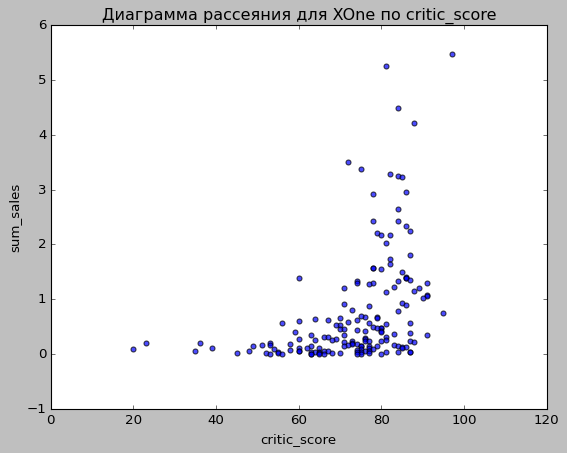

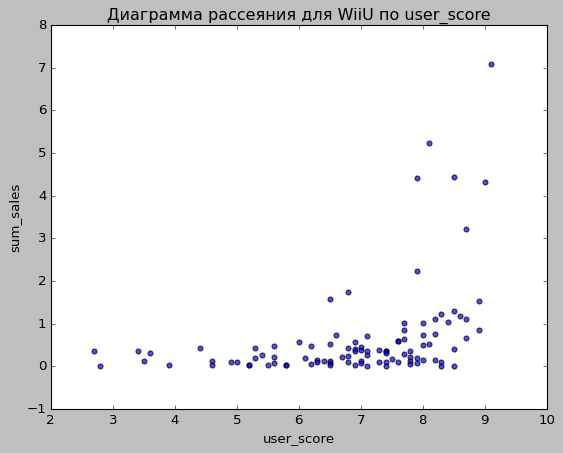

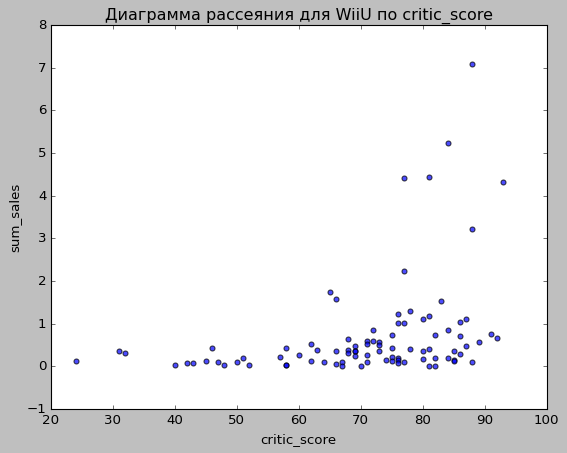

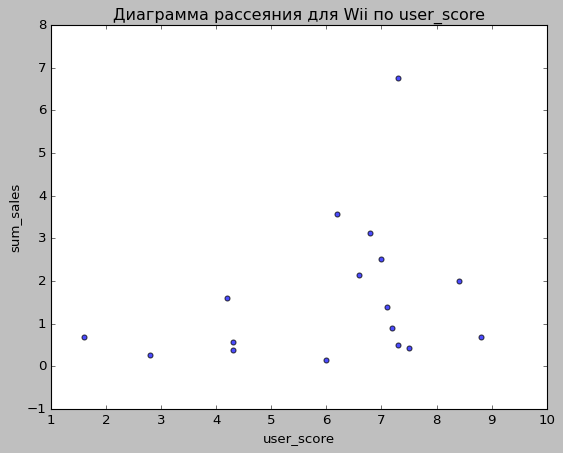

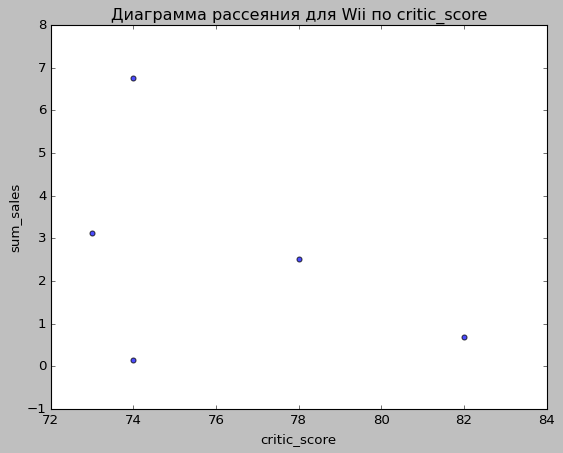

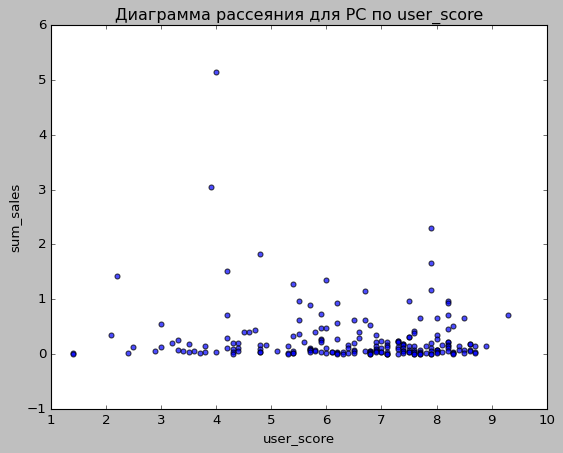

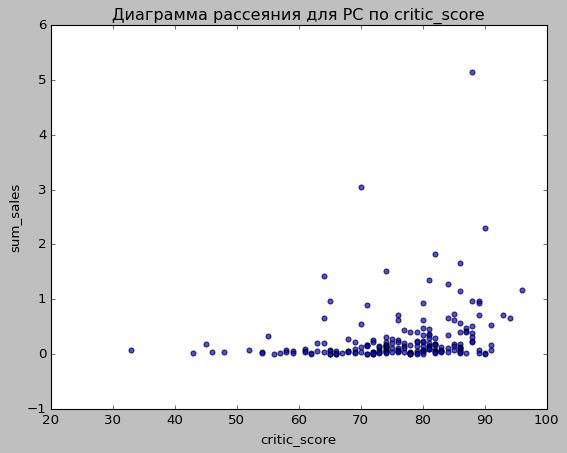

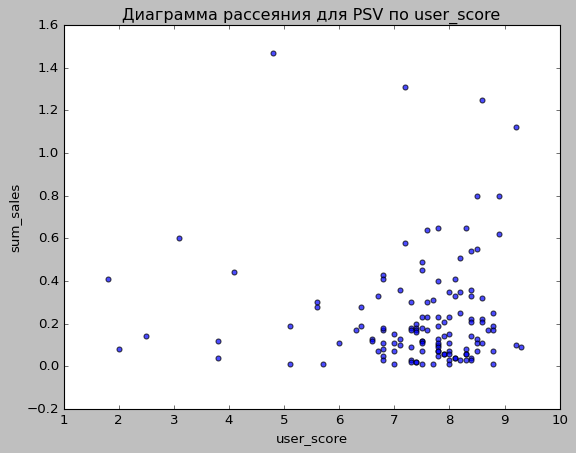

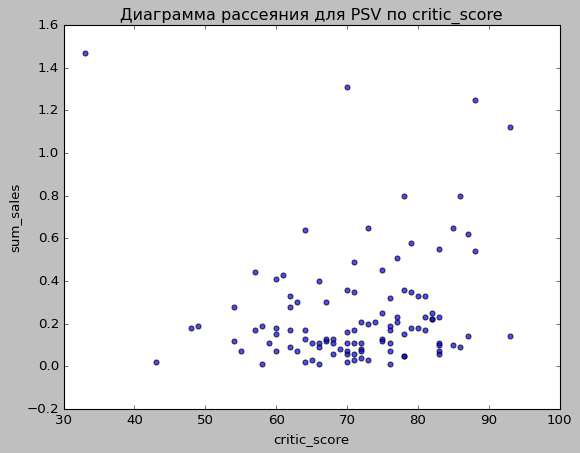

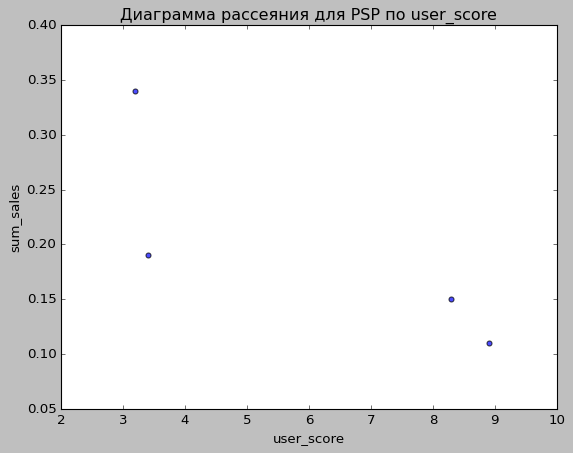

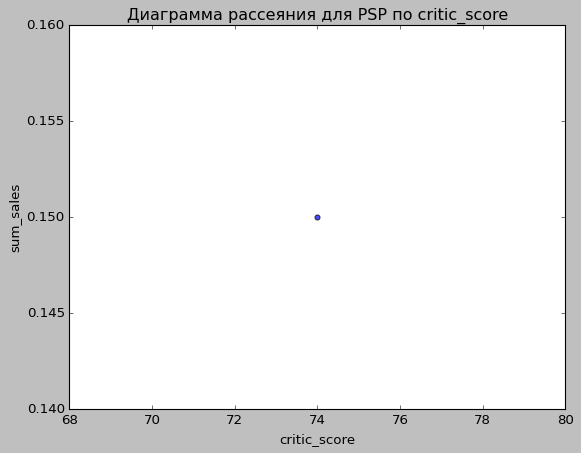

In [40]:
#Строю диаграммы рассеяния по другим платформам периода с 2012 кроме PS4
score_types = ('user_score', 'critic_score')
 
for platform_name in df_for_ratings_other.platform.unique():
    for score_type in score_types:
        (df_for_ratings_other[df_for_ratings_other['platform'] == platform_name]
         .plot(x=score_type, 
               y='sum_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {} по {}'.format(platform_name, score_type), 
               alpha = 0.7))
        plt.show()

In [41]:
df_for_ratings_other.platform.unique()

array(['PS3', 'X360', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'PSP'], dtype=object)

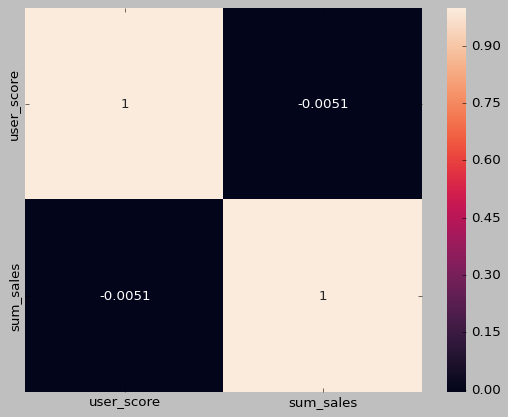

In [42]:
# Проверяю существует ли зависимость между оценками критиков, пользователей и продажами для платформ PS3 и X360
sns.heatmap(df_for_ratings_other[df_for_ratings_other['platform'] == 'PS3'][['user_score','sum_sales']].corr(method='pearson'), annot=True)


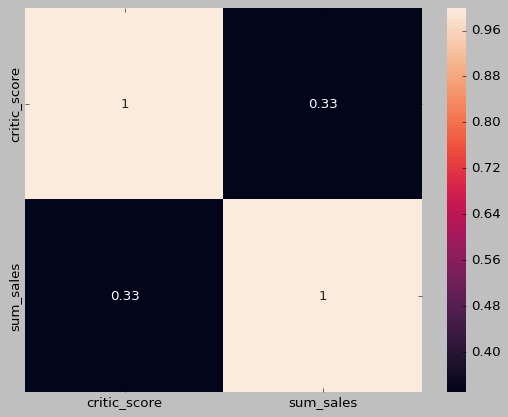

In [43]:
sns.heatmap(df_for_ratings_other[df_for_ratings_other['platform'] == 'PS3'][['critic_score','sum_sales']].corr(method='pearson'), annot=True)

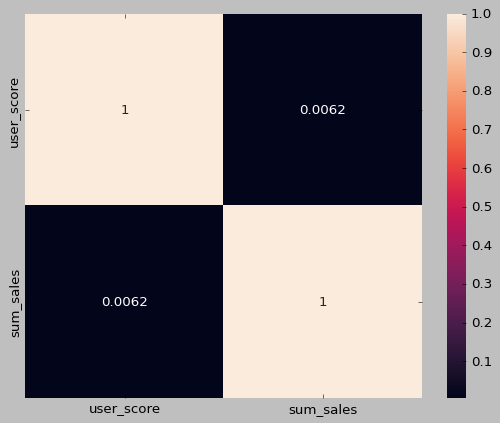

In [44]:
sns.heatmap(df_for_ratings_other[df_for_ratings_other['platform'] == 'X360'][['user_score','sum_sales']].corr(method='pearson'), annot=True)

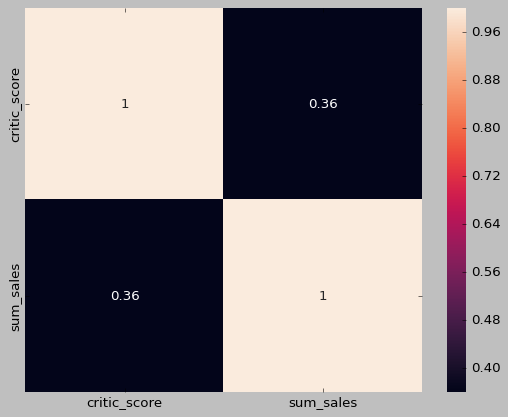

In [45]:
sns.heatmap(df_for_ratings_other[df_for_ratings_other['platform'] == 'X360'][['critic_score','sum_sales']].corr(method='pearson'), annot=True)

**Вывод:**   По диаграмме рассеяния между пользовательскими рейтингами и продажами у лидирующей платформы - PS4, наблюдается, что зависимости нет, а между оценками критиков и суммарными продажами есть слабая линейная зависимость. Видимо пользователи больше доверяют критикам и роликам и стримам на ютубе, нежели другим пользователям и их оценкам.

По другим платформам также нет зависимости между оценками пользователей и рейтингом и есть слабая линейная зависимость между оценками критиков и продажами.

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [46]:
#Вывожу сводную таблицу по количеству игр по жанрам
df_query.genre.value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [47]:
# Вывожу сводную таблицу по медианной сумме продаж по жанрам игр на период с 2012 по 2016 годы
df_query.groupby('genre')['sum_sales'].median().sort_values(ascending = False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: sum_sales, dtype: float64

In [ ]:
import plotly.express as px
fig = px.box(df_query,
            x='genre',
            y='sum_sales',
            title='Глобальные продажи по платформам за актуальный период',
            labels={'genre' : 'Жанры',
                   'sum_sales' : 'Продажи'},
             range_y = (0,6),
             color='genre',
             boxmode='overlay',
             
            )
fig.update_xaxes(categoryorder='median descending')
fig.show()

**Вывод:** За актуальный период по медианным суммарным продажам лидирует жанр "Shooter". Также стоит отметить выделяющиеся жанры "Platform" и "Sports".

In [49]:
#Вывожу таблицу с топ-5 платформами по продажам в Северной Америке и
#вывожу визуализацию в виде круговой диаграммы доли продаж по платформам 
na_platform = df_query.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
na_platform['percent'] = na_platform['na_sales']/sum(na_platform['na_sales'])

na_platform['good_platform'] = na_platform.index
other_platform_na = list(na_platform.index)[5:]
for i in other_platform_na:
    na_platform['good_platform'] = na_platform['good_platform'].replace(i,'other')
na_platform = na_platform.groupby('good_platform').agg({'na_sales':'sum', 'percent':'sum'})
display(na_platform)

,na_sales,percent
good_platform,,
3DS,55.31,0.093592
PS3,103.38,0.174933
PS4,108.74,0.184003
X360,140.05,0.236983
XOne,93.12,0.157571
other,90.37,0.152918


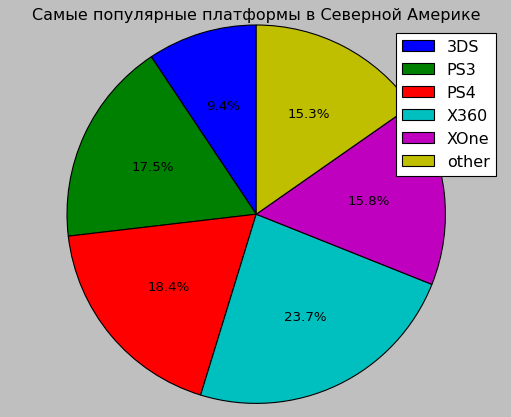

In [50]:
import matplotlib.pyplot as plt
labels = list(na_platform.index)
sizes = list(na_platform['percent'])
plt.title('Самые популярные платформы в Северной Америке')
pie = plt.pie(sizes,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'upper right', labels=labels)
plt.show()

In [51]:
#Вывожу таблицу с топ-5 платформами по продажам в Европе и
#вывожу визуализацию в виде круговой диаграммы доли продаж по платформам 
eu_platform = df_query.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
eu_platform['percent'] = eu_platform['eu_sales']/sum(eu_platform['eu_sales'])

eu_platform['good_platform'] = eu_platform.index
other_platform_eu = list(eu_platform.index)[5:]
for i in other_platform_eu:
    eu_platform['good_platform'] = eu_platform['good_platform'].replace(i,'other')
eu_platform = eu_platform.groupby('good_platform').agg({'eu_sales':'sum', 'percent':'sum'})
display(eu_platform)

,eu_sales,percent
good_platform,,
3DS,42.64,0.084132
PS3,106.86,0.210844
PS4,141.09,0.278383
X360,74.52,0.147034
XOne,51.59,0.101792
other,90.12,0.177815


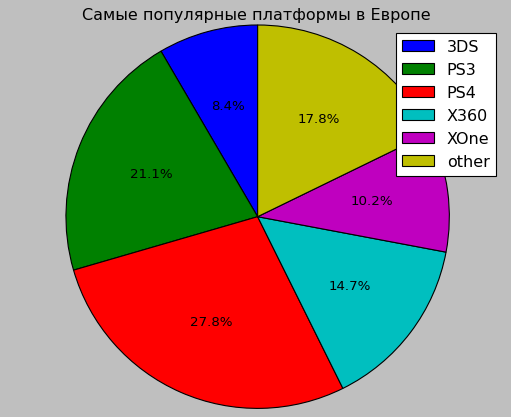

In [52]:
import matplotlib.pyplot as plt
labels = list(eu_platform.index)
sizes = list(eu_platform['percent'])
plt.title('Самые популярные платформы в Европе')
pie = plt.pie(sizes,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'upper right', labels=labels)
plt.show()

In [53]:
#Вывожу таблицу с топ-5 платформами по продажам в Японии и
#вывожу визуализацию в виде круговой диаграммы доли продаж по платформам 
jp_platform = df_query.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
jp_platform['percent'] = jp_platform['jp_sales']/sum(jp_platform['jp_sales'])
jp_platform['good_platform'] = jp_platform.index
jp_platform['good_platform'] = jp_platform['good_platform'].replace('XOne','other').replace('X360','other').replace('PC','other').replace('Wii','other') \
.replace('DS','other').replace('PSP','other')
jp_platform = jp_platform.groupby('good_platform').agg({'jp_sales':'sum', 'percent':'sum'})
display(jp_platform)

,jp_sales,percent
good_platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PS4,15.96,0.082875
PSV,21.04,0.109253
WiiU,13.01,0.067556
other,19.49,0.101205


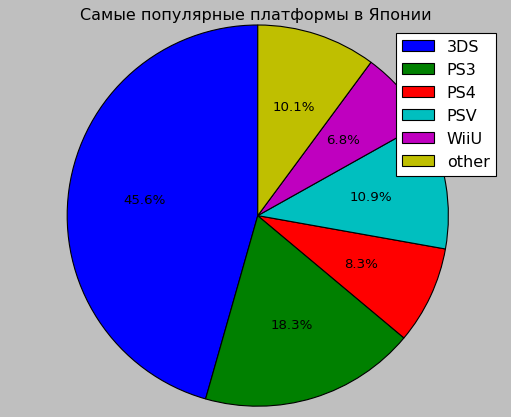

In [54]:
import matplotlib.pyplot as plt
labels = list(jp_platform.index)
sizes = list(jp_platform['percent'])
plt.title('Самые популярные платформы в Японии')
pie = plt.pie(sizes,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'upper right', labels=labels)
plt.show()

In [55]:
#Вывожу таблицу с общими топ платформами в Японии и Европе и сравниваю их по популярности
m = jp_platform.merge(eu_platform, how = 'inner', on = 'good_platform')
m

,jp_sales,percent_x,eu_sales,percent_y
good_platform,,,,
3DS,87.79,0.455862,42.64,0.084132
PS3,35.29,0.183249,106.86,0.210844
PS4,15.96,0.082875,141.09,0.278383
other,19.49,0.101205,90.12,0.177815


Text(0.5, 1.0, 'В Японии популярнее платформа 3DS, а в европе PS3 и PS4')

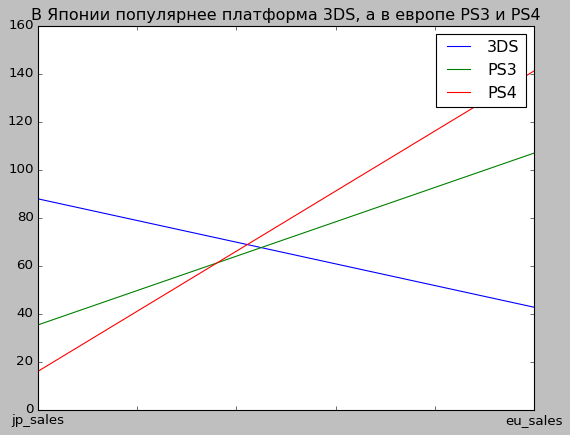

In [56]:
n = m[['jp_sales', 'eu_sales']]
sp5 = list(n.index)
sp6 = list(range(3))
for i,j in zip(sp5,sp6): 
  n1 = n.iloc[j, :]
  label = str(i)
  n1.plot(label= label)  
  plt.legend ()
plt.title('В Японии популярнее платформа 3DS, а в европе PS3 и PS4')


In [57]:
#Вывожу таблицу с общими топ платформами в Японии и Северной америке и сравниваю их по популярности
k = jp_platform.merge(na_platform, how = 'inner', on = 'good_platform')
k

,jp_sales,percent_x,na_sales,percent_y
good_platform,,,,
3DS,87.79,0.455862,55.31,0.093592
PS3,35.29,0.183249,103.38,0.174933
PS4,15.96,0.082875,108.74,0.184003
other,19.49,0.101205,90.37,0.152918


Text(0.5, 1.0, 'В Японии популярнее платформа 3DS, а в Северной Америке PS3 и PS4')

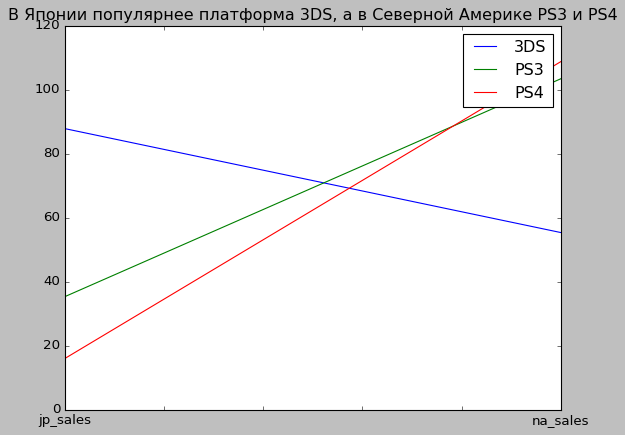

In [58]:
b = k[['jp_sales', 'na_sales']]
sp5 = list(k.index)
sp6 = list(range(3))
for i,j in zip(sp5,sp6): 
  b1 = b.iloc[j, :]
  label = str(i)
  b1.plot(label= label)  
  plt.legend ()
plt.title('В Японии популярнее платформа 3DS, а в Северной Америке PS3 и PS4')

In [59]:
#Вывожу таблицу с общими топ платформами в Европе и Северной америке и сравниваю их по популярности
f = na_platform.merge(eu_platform, how = 'inner', on = 'good_platform')
f

,na_sales,percent_x,eu_sales,percent_y
good_platform,,,,
3DS,55.31,0.093592,42.64,0.084132
PS3,103.38,0.174933,106.86,0.210844
PS4,108.74,0.184003,141.09,0.278383
X360,140.05,0.236983,74.52,0.147034
XOne,93.12,0.157571,51.59,0.101792
other,90.37,0.152918,90.12,0.177815


Text(0.5, 1.0, 'В Европе популярнее платформы PS4 и PS3, а в Северной Америке X360, XOne и 3DS')

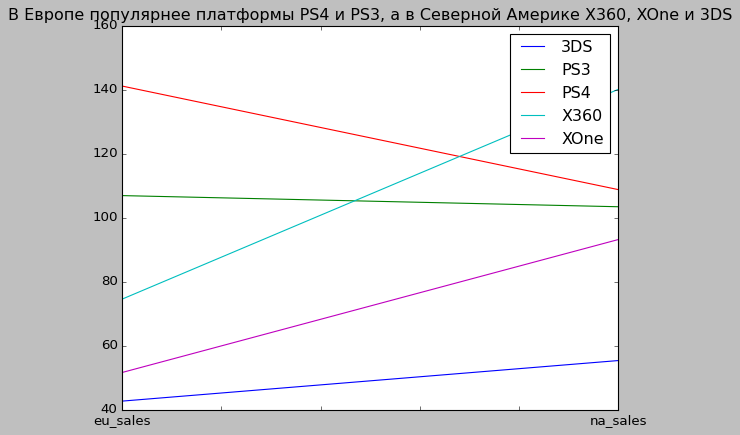

In [60]:
eu_na_sales = f[['eu_sales', 'na_sales']]
sp5 = list(f.index)
sp6 = list(range(5))
for i,j in zip(sp5,sp6): 
  l1 = eu_na_sales.iloc[j, :]
  label = str(i)
  l1.plot(label= label)  
  plt.legend ()
plt.title('В Европе популярнее платформы PS4 и PS3, а в Северной Америке X360, XOne и 3DS')

**Вывод:**  Для Северной Америки популярны платформы под брендом Microsoft XOne и X360, которые не входят в топ-5 в Японии. Видимо у микрософта хорошо работает маркетинг усебя на родине. Японские же бренды PS3, PS4 и 3DS более популярны у себя на родине в Японии и в Европе, чем в Америке.

В Европе и америке больше предпочитают платформы для дома или компьютерных клубов. В Японии больше любят ещё и портативные платформы, такие как 3DS.

In [61]:
#Строю функцию и вывожу таблицы с топ-5 жанрами игр по продажам в Японии,Северной америке и Европе и
#вывожу визуализацию в виде круговой диаграммы доли продаж по платформам 
def genre(name_sales, contry):
    name_genre = df_query.groupby(by='genre').agg({name_sales:'sum'}).sort_values(by= name_sales, ascending=False)
    name_genre['percent'] = name_genre[name_sales]/sum(name_genre[name_sales])

    name_genre['good_platform'] = name_genre.index
    other_genre_eu = list(name_genre.index)[5:]
    for i in other_genre_eu:
        name_genre['good_platform'] = name_genre['good_platform'].replace(i,'other')
    name_genre = name_genre.groupby('good_platform').agg({name_sales:'sum', 'percent':'sum'})
        
    display(name_genre)
    import matplotlib.pyplot as plt
    labels = list(name_genre.index)
    sizes = list(name_genre['percent'])
    plt.title('Самые популярные жанры в {}'.format(contry))
    pie = plt.pie(sizes,autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.legend( loc = 'lower right', labels=labels)
    plt.show()

,na_sales,percent
good_platform,,
Action,177.84,0.300929
Misc,38.19,0.064623
Role-Playing,64.00,0.108297
Shooter,144.77,0.244970
Sports,81.53,0.137960
other,84.64,0.143222


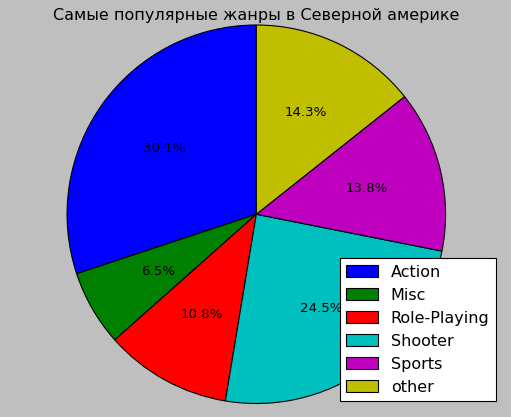

In [62]:
import warnings
warnings.filterwarnings("ignore")
genre('na_sales', 'Северной америке')

,eu_sales,percent
good_platform,,
Action,159.34,0.314392
Racing,27.29,0.053846
Role-Playing,48.53,0.095754
Shooter,113.47,0.223886
Sports,69.09,0.136321
other,89.10,0.175802


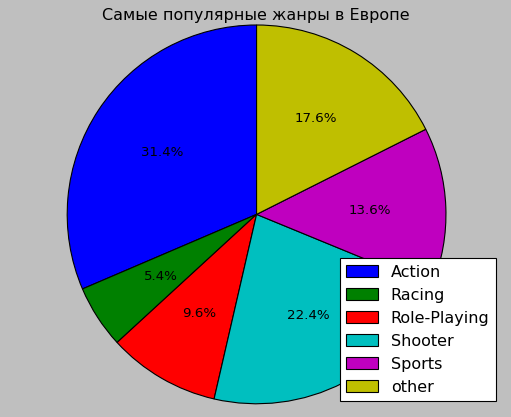

In [63]:
genre('eu_sales', 'Европе')

,jp_sales,percent
good_platform,,
Action,52.80,0.274172
Fighting,9.44,0.049019
Misc,12.86,0.066777
Role-Playing,65.44,0.339807
Simulation,10.41,0.054055
other,41.63,0.216170


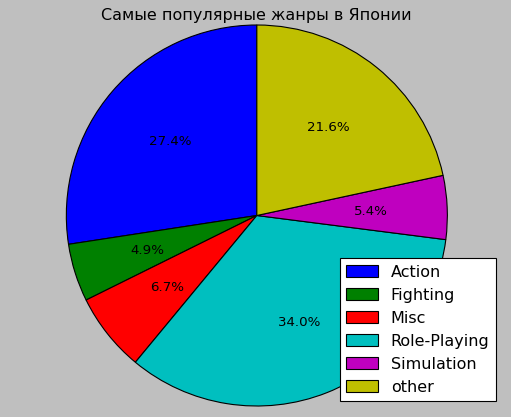

In [64]:
import warnings
warnings.filterwarnings("ignore")
genre('jp_sales', 'Японии')

In [65]:
sales_genre_na = df_query.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by= 'na_sales', ascending=False).head(5)
sales_genre_eu = df_query.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by= 'eu_sales', ascending=False).head(5)
sales_genre_jp = df_query.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by= 'jp_sales', ascending=False).head(5)
sales_genre_all = pd.merge(sales_genre_na,sales_genre_eu, on = 'genre', how = 'outer').merge(sales_genre_jp, on = 'genre', how = 'outer')
sales_genre_all

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,NaN
Sports,81.53,69.09,NaN
Role-Playing,64.00,48.53,65.44
Misc,38.19,NaN,12.86
Racing,NaN,27.29,NaN
Simulation,NaN,NaN,10.41
Fighting,NaN,NaN,9.44


**Вывод:** Предпочтения в жанрах игр в Северной америке и Европе схожи - Action и Shooter в лидерах. А вот в Японии лидирует Role-Playing, а также есть жанры Simulation и Fighting и нет Shooter и Sports. Это может быть связано с менталитетом, Европейский менталитет ближе к США, чем к Японии - вот и предпочтения схожи.

In [66]:
#Пишу функцию для расшифровки категорий
import warnings
warnings.filterwarnings("ignore")
def rating_translate(row):
    try:
        if row['rating'] == 'E':
            return 'Everyone'
        elif row['rating'] == 'M':
            return 'Mature'
        elif row['rating'] == 'T':
            return 'Teen'
        elif row['rating'] == 'E10+':
            return 'Everyone 10+ and older'
        elif row['rating'] == 'RP':
            return 'Rating Pending'
        elif row['rating'] == 'AO':
            return 'Adults Only 18+'
        elif row['rating'] == 'K-A':
            return 'K-A'
        elif row['rating'] == 'K-A':
            return 'K-A'
        elif row['rating'] == -1:
            return 'random_rating'
        elif row['rating'] == 'EC':
            return 'Early Childhood'
    except:
        pass

df_query['sign'] = df_query.apply(rating_translate, axis = 1)




# K-A: Для детей – для тех, кто уже научился говорить и держать джойстик, 
# эти игры уже могут вызывать интерес [позже в 1998 году был переименован 
# в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т]

In [67]:
#Строю функцию и вывожу таблицы с категориями игр по продажам в Японии,Северной америке и Европе и
#вывожу визуализацию в виде круговой диаграммы доли продаж по платформам
def show_infuence_sales_from_ESRB(contry_sales, contry):
    name = df_query.groupby(by='sign').agg({contry_sales:'sum'}).sort_values(by= contry_sales, ascending=False)
    name['percent'] = name[contry_sales]/sum(name[contry_sales])  
    display(name)
    import matplotlib.pyplot as plt
    labels = list(name.index)
    sizes = list(name['percent'])
    plt.title('Самые популярные категории игр в {}'.format(contry))
    pie = plt.pie(sizes,autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.legend( loc = 'best', labels=labels)
    plt.show()

,na_sales,percent
sign,,
Mature,231.57,0.391847
Everyone,114.37,0.193529
random_rating,103.31,0.174814
Everyone 10+ and older,75.70,0.128094
Teen,66.02,0.111715


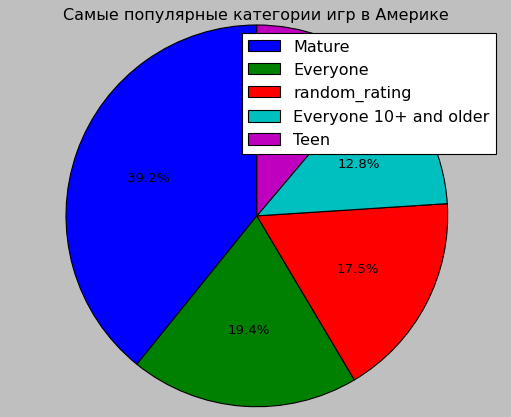

In [68]:
show_infuence_sales_from_ESRB('na_sales', 'Америке')

,eu_sales,percent
sign,,
Mature,193.96,0.382700
Everyone,113.03,0.223018
random_rating,91.50,0.180537
Everyone 10+ and older,55.37,0.109250
Teen,52.96,0.104495


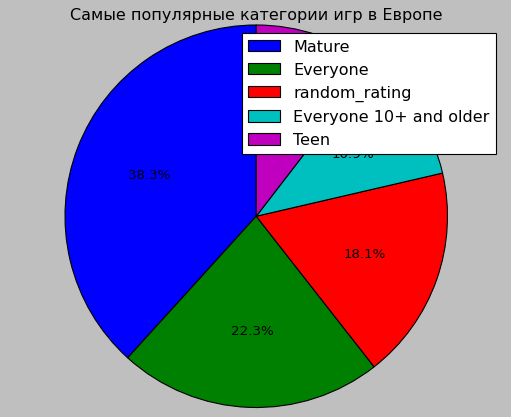

In [69]:
show_infuence_sales_from_ESRB('eu_sales', 'Европе')

,jp_sales,percent
sign,,
random_rating,108.84,0.565168
Everyone,28.33,0.147108
Teen,26.02,0.135113
Mature,21.20,0.110084
Everyone 10+ and older,8.19,0.042528


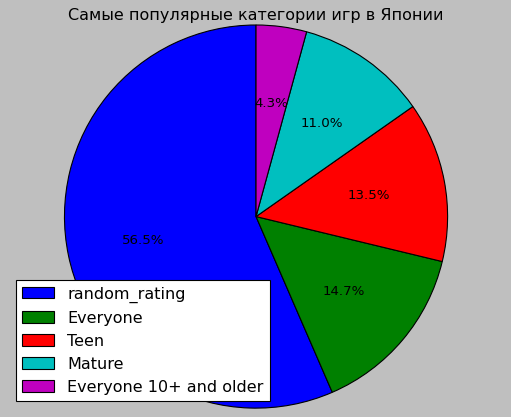

In [70]:
import warnings
warnings.filterwarnings("ignore")
show_infuence_sales_from_ESRB('jp_sales', 'Японии')

In [71]:
#Строю функцию и свожу в общую таблицы продажи по категориям в Северной америке, Европе и Японии и
#вывожу визуализацию в виде столбчатых диаграмм
def show_infuence_sales_from_ESRB1(contry_sales):
  name = df_query.groupby(by='sign').agg({contry_sales:'sum'}).sort_values(by= contry_sales, ascending=False).head(5)
  name['percent'] = name[contry_sales]/sum(name[contry_sales])
  display(name)

In [72]:
name1 = df_query.groupby(by='sign').agg({'na_sales':'sum'}).sort_values(by= 'na_sales', ascending=False).head(5).copy()
name2 = df_query.groupby(by='sign').agg({'eu_sales':'sum'}).sort_values(by= 'eu_sales', ascending=False).head(5).copy()
name3 = df_query.groupby(by='sign').agg({'jp_sales':'sum'}).sort_values(by= 'jp_sales', ascending=False).head(5).copy()
all_sales = pd.merge(name1, name2, how = 'inner', on='sign').merge(name3, how = 'inner', on='sign')
all_sales

,na_sales,eu_sales,jp_sales
sign,,,
Mature,231.57,193.96,21.20
Everyone,114.37,113.03,28.33
random_rating,103.31,91.50,108.84
Everyone 10+ and older,75.70,55.37,8.19
Teen,66.02,52.96,26.02


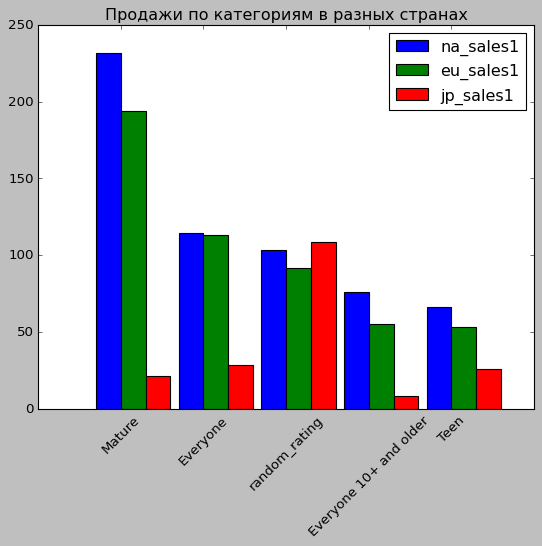

In [73]:
from unicodedata import category
category = [i for i in list(all_sales.index)]
na_sales1 = list(all_sales['na_sales']) 
eu_sales1 = list(all_sales['eu_sales']) 
jp_sales1 = list(all_sales['jp_sales']) 
width = 0.3
x = np.arange(len(category))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, na_sales1, width, label='na_sales1')
rects2 = ax.bar(x + width/2, eu_sales1, width, label='eu_sales1')
rects3 = ax.bar(x + 1.5*width, jp_sales1, width, label='jp_sales1')

ax.set_title('Продажи по категориям в разных странах')
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.set_xticks(x)
ax.set_xticklabels(category)
ax.legend()

In [74]:
# Комментарий ревьюера
temp = df_query.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


-1      1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

**Вывод:** Основная часть населения в США/Канаде и Европе - это граждане зрелого возраста, поэтому преобладают категории игр для всех или для зрелого возраста. Также в этих странах есть игры с неопределённым рейтингом на третьем месте, который определяется только в Северной америке.  В Японии же на первом месте игры без рейтинга, которые составляют более половины. Возможно, большая из этих игр родом из Японии или Европы, где играм не присваивается этот рейтинг. Далее в Японии идут игры для всех и для подростков.



# Проверка гипотезы

## Гипотеза о равенстве средних пользовательских оценок для платформ Xbox One и PC

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [75]:
xbox_one = df_query[(df_query['platform'] == "XOne") & (df_query['user_score'] >= 0)]['user_score']
pc = df_query[(df_query['platform'] == "PC") & (df_query['user_score'] >= 0)]['user_score']

In [76]:
#Смотрю средние оценки пользователей для xbox_one
xbox_one.mean()

6.521428571428572

In [77]:
#Смотрю средние оценки пользователей для pc
pc.mean()

6.4286407766990274

Для формулировки нулевой гипотезы берём то, что имеем на данный момент или из предыдущих замеров/данных, или делаем предположение, что ничего нет, на то она и нулевая гипотеза. По традиции считается, что изучаемые данные не содержат того, что исследователь ищет. Таким образом, консервативное мнение заключается в том, что данные не покажут ничего необычного. Для первой гипотезы у нас средние примерно равны.

Применяю t -тест Стьюдента или просто «t -тест», так как 
нужно сравнить две группы количественных признаков с нормальным распределением.

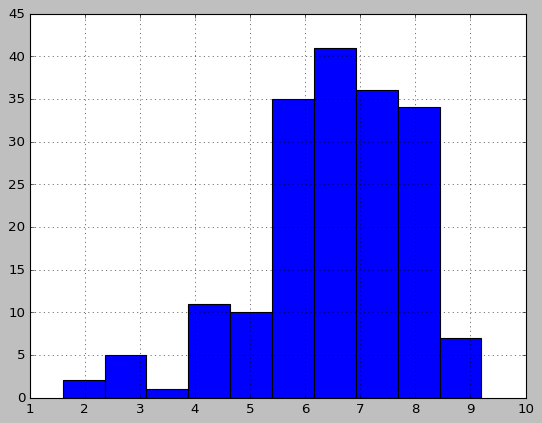

In [78]:
#Смотрю распределение для xbox_one, по гистограмме близко к нормальному
xbox_one.hist()

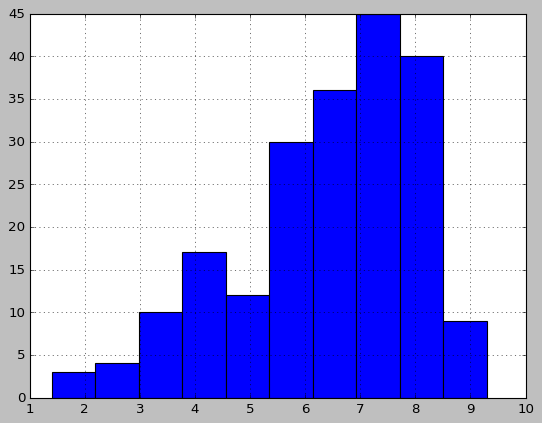

In [79]:
#Смотрю распределение для pc, по гистограмме близко к нормальному
pc.hist()

In [80]:
from scipy import stats as st

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(xbox_one, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод:**   Средние пользовательские рейтинги двух выборок по платформам Xone и PC равны. Возможно, так происходит потому, что многие игры на PC доступны также и на Xbox.

## Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. 

- H1: Средние пользовательские рейтинги жанров Action и Sports разные.



In [81]:
action = df_query[(df_query['genre'] == "Action") & (df_query['user_score'] >= 0)]['user_score']
sports = df_query[(df_query['genre'] == "Sports") & (df_query['user_score'] >= 0)]['user_score']

In [82]:
print(df_query.groupby(['platform', 'genre'])['user_score'].mean())

platform  genre       
3DS       Action          6.786957
          Adventure       7.250000
          Fighting        6.250000
          Misc            7.371429
          Platform        7.133333
                            ...   
XOne      Role-Playing    7.522222
          Shooter         6.561290
          Simulation      6.300000
          Sports          5.567647
          Strategy        7.500000
Name: user_score, Length: 120, dtype: float64


In [83]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод:**   
Оценки по рейтингам Action и Sports с большой вероятностью разные. Это совершенно разные жанры со своей целевой аудиторией и разной степенью монетизации, от того и такие отличия.

Пояснил как сформулировал нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

# Общий вывод

Шаг 6. Напишите общий вывод

В проекте были проанализированны данные и проведена предобработка. В столбцах user_score и year_of_release был поменян формат, заменён регистр в названии столбцов.

- В столбцах name, genre и year_of_release мало пропущенных значений - удалил строки с пропусками. 
- в столбцах critic_score, user_score и rating много пропущенных значений, оставил их пустыми. 

- В пропусках прослеживается зависимость, если какогото убрать пустые значения одного столбца (например, Critic_Score), то большинстов пустых значений также уходят User_Score и Rating (пересечение множеств). Полагаю, что для расчёта рейтинга используются данные Critic_Score и User_Score. Пустые значения в столбцах Critic_Score и User_Score можно объяснить, что не все игры мега популярны и возможно собрать достаточное количество оценок, также может быть, что данные скрыты, технические причины (например, при передаче информации данные не отобразились или оператор их не ввёл). Также можно посмотреть на года игр. Когда выходили некоторые игры ещё не было такой профессии аналитик и данные по оценкаам просто не собирались.

- Возможно, year_of_release не заполнено, потому что игра не вышла или вышла с задержкой. В столбцах name, genre вероятная причина пропусков - невнимательность оператора или ошибки при передачи информации.

- Максимальное количество игр было в 2008 и 2009 годах, а потом пошло на спад. Связано это может быть с международным финансовым кризисом, когда покупательская способность у мирового населения снизилась. Также развивается пиратство в сфере игр и развиваются компьютерные игры и мобильные приложения, которые замещают игровые платформы. 

- Какого-то определённого срока жизни платформы нет, есть те, которые активны 1-2 года, а есть, которые по 12 лет, есть палтформы с двумя пиками активноcти.
Прогноз на 2017 год для лидеров по продажам:

- будут существовать: 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV'

- не будут существовать или прибыль будет минимальна:  
'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', '2600', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG', 'PCFX'

- Наблюдается, что все представленные платформы находяится в состоянии спада. Можно предположить, что в 2017 году продажи будут также на низком уровне. Это может быть связано с общим спадом продаж в игровой индустрии о чём свидетельствует диаграмма распределения количества игр по годам.

- В разбивке по платфомам в периоде с 2012 года видно, что по медианному значению лидируют платформы x360, WiiU и XOne.

- По диаграмме рассеяния между пользовательскими рейтингами и продажами у лидирующей платформы - PS4, наблюдается, что зависимости нет, а между оценками критиков и суммарными продажами есть слабая линейная зависимость. Видимо пользователи больше доверяют критикам и роликам и стримам на ютубе, нежели другим пользователям и их оценкам.

- По другим платформам также нет зависимости между оценками пользователей и рейтингом и есть слабая линейная зависимость между оценками критиков и продажами.

- За актуальный период лидирует среди продаж жанр "Action". Также стоит отметить выделяющиеся жанры "Shooter", "Role-Playing" и "Sports". Все эти жанры сильно выделяются среди всех остальных.

- Для Северной Америки популярны платформы под брендом Microsoft XOne и X360, которые не входят в топ-5 в Японии. Видимо у микрософта хорошо работает маркетинг усебя на родине. Японские же бренды PS3, PS4 и 3DS более популярны у себя на родине в Японии и в Европе, чем в Америке.

- В Европе и америке больше предпочитают платформы для дома или компьютерных клубов. В Японии больше любят ещё и портативные платформы, такие как 3DS.

- Предпочтения в жанрах игр в Северной америке и Европе схожи - Action и Shooter в лидерах. А вот в Японии лидирует Role-Playing, а также есть жанры Simulation и Fighting и нет Shooter и Sports. Это может быть связано с менталитетом, Европейский менталитет ближе к США, чем к Японии - вот и предпочтения схожи.

- Основная часть населения в Японии, США и Европе - это граждане зрелого возраста, поэтому преобладают категории игр для всех или для зрелого возраста. В Японии на втором месте категория игр для подростков, в то время как в США и Европе она на последнем. Это может быть связано с системой образования в этих странах, культурой и маркетингом. В Японии много занятий в игровой форме в детстве, а потом начинаются жёсткие рабочие будни и не до игр, в то время как в США тинейджеры больше любят ходить в церковь по субботам, тусовки, очень популяны спортивные мероприятия типо бейсбола и американского футбола, а в зрелом возрасте можно и поиграть. 

- Средние пользовательские рейтинги двух выборок по платформам Xone и PC равны. Возможно, так происходит потому, что многие игры на PC доступны также и на Xbox.
 
- Оценки по рейтингам Action и Sports с большой вероятностью разные. Это совершенно разные жанры со своей целевой аудиторией и разной степенью монетизации, от того и такие отличия.